# Prerequisites and Persistence

In [1]:
# Uncomment below for colab environment
# !pip install transformers
# !pip install spacy-langdetect

In [2]:
# Change working directory for the whole colab environment
# Only for colab environment
# %cd "/content/drive/MyDrive/Data Science Synthesis"

# Imports

## Spacy

In [3]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [4]:
def get_lang_detector(nlp, name):
  return LanguageDetector()

## Cleaning Sentences

In [5]:
from text_pre_processing import remove_html_tags_func
from text_pre_processing import remove_url_func
from text_pre_processing import remove_accented_chars_func
from text_pre_processing import remove_punctuation_func
from text_pre_processing import remove_irr_char_func
from text_pre_processing import remove_extra_whitespaces_func
from text_pre_processing import word_count_func
from text_pre_processing import word_tokenize
from text_pre_processing import remove_english_stopwords_func
from text_pre_processing import norm_lemm_v_a_func
from text_pre_processing import remove_single_char_func
from text_pre_processing import most_common_word_func
from text_pre_processing import least_common_word_func
from text_pre_processing import single_word_remove_func
from text_pre_processing import multiple_word_remove_func
from text_pre_processing import most_rare_word_func

## Data Sciency Basics

In [6]:
import pandas as pd
import numpy as np

# Twitter Data

## Scrub scrub

In [7]:
tw = pd.read_csv("../dataset/tsv/event_tw_p1y.tsv", sep="\t")

/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
tw

user_id  \
0       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
1       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
2       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
3       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
4       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
...                                                   ...   
463810  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463811  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463812  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463813  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463814  58818f81004612944d302a14d4efccd9d5333b8f63819c...   

                                          user_name              post_id  \
0                spiked-determined-dragonfly-of-awe  1439238781253550085   
1       congenial-porcupine-of-pragmatic-enrichment  1405849658295918594   
2                    rebel-hissing-waxbill-of-pride  1396027145386795009   
3               stoic-psychedelic-squirrel-of-vigor  1388764925808447491   
4                 handsome-famous-cassowary-of-glee  1377044390074404864   
...                                             ...                  ...   
463810       smiling-friendly-dalmatian-of-infinity  1327585483426320386   
463811           macho-rebel-mackerel-of-masquerade  1320883526858801154   
463812              grumpy-hypersonic-clam-of-vigor  1314518223895830530   
463813   fresh-prehistoric-jaguarundi-of-virtuosity  1308704510072815619   
463814          furry-crouching-mayfly-of-satiation  1307581448841461761   

                           post_date  \
0       Sat Sep 18 22:43:59 SGT 2021   
1       Fri Jun 18 19:27:32 SGT 2021   
2       Sat May 22 16:56:23 SGT 2021   
3       Sun May 02 15:58:54 SGT 2021   
4       Wed Mar 31 07:45:41 SGT 2021   
...                              ...   
463810  Sat Nov 14 20:13:39 SGT 2020   
463811  Tue Oct 27 08:22:28 SGT 2020   
463812  Fri Oct 09 18:49:01 SGT 2020   
463813  Wed Sep 23 17:47:24 SGT 2020   
463814  Sun Sep 20 15:24:45 SGT 2020   

                                             post_content  post_is_retweet  \
0       @anonymised_user Pah zhiam bueh pah zhiam bueh...            False   
1       The current active #Covid19 #clusters in #Sing...             True   
2       Somehow...I feel it coming. . . Judging from t...             True   
3       Pronunciation of AZ. . British: A-Zed. America...             True   
4       Since April Fools Day is fast approaching,. th...             True   
...                                                   ...              ...   
463810  உங்களுக்கும் உங்கள் சுற்றத்தாருக்கும் இனிய தீப...            False   
463811  “The first thing I’d get rid off from my life…...            False   
463812  Seems like home is the best place one can pose...            False   
463813  *Insert pretentious caption* https://t.co/IRK9...            False   
463814  Some Pig Pudding folks?. @socialplacesg @ Soci...            False   

        post_is_truncated  post_like_count  post_retweet_count post_media  \
0                   False                0                   0        NaN   
1                   False                0                  70      photo   
2                   False                0                 117        NaN   
3                   False                0                  15        NaN   
4                   False                0               47840      photo   
...                   ...              ...                 ...        ...   
463810              False                0                   0        NaN   
463811              False                0                   0        NaN   
463812              False                0                   0        NaN   
463813              False                0                   0        NaN   
463814              False                0                   0        NaN   

                                            post_hashtags pos

In [9]:
tw.describe()

post_id  post_like_count  post_retweet_count  \
count  4.638150e+05    463815.000000        4.638150e+05   
mean   1.378788e+18         1.033434        2.783151e+03   
std    4.067893e+16        60.191097        1.721745e+04   
min    1.300464e+18         0.000000        0.000000e+00   
25%    1.346596e+18         0.000000        0.000000e+00   
50%    1.384710e+18         0.000000        0.000000e+00   
75%    1.414305e+18         0.000000        1.560000e+02   
max    1.440222e+18     39577.000000        1.124982e+06   

       post_reply_to_post_id  
count           4.638150e+05  
mean            2.958955e+17  
std             5.667057e+17  
min            -1.000000e+00  
25%            -1.000000e+00  
50%            -1.000000e+00  
75%            -1.000000e+00  
max             1.440219e+18

In [10]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463815 entries, 0 to 463814
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                463815 non-null  object
 1   user_name              463815 non-null  object
 2   post_id                463815 non-null  int64 
 3   post_date              463815 non-null  object
 4   post_content           463800 non-null  object
 5   post_is_retweet        463815 non-null  bool  
 6   post_is_truncated      463815 non-null  bool  
 7   post_like_count        463815 non-null  int64 
 8   post_retweet_count     463815 non-null  int64 
 9   post_media             149498 non-null  object
 10  post_hashtags          88212 non-null   object
 11  post_user_mentions     92032 non-null   object
 12  post_reply_to_post_id  463815 non-null  int64 
 13  segment_name           463815 non-null  object
dtypes: bool(2), int64(4), object(8)
memory usage: 43.3+ 

### Changing time from string to datetime object (UTC)

In [11]:
# Sanity check that post_date is not secretly a datetime object

import datetime

isinstance(tw["post_date"][0], str)

True

In [12]:
# Example: Sat Sep 18 22:43:59 SGT 2021 (date is zero-padded)
# The colab runtime only recognises UTC, so we have to change the SGT time
# to UTC by subtracting a time delta of 8 hours.

tw["post_date"] = pd.to_datetime(tw["post_date"], format="%a %b %d %H:%M:%S SGT %Y") - pd.Timedelta('08:00:00')

### Changing booleans to binary

In [13]:
# Hacky bool -> int method

tw["post_is_retweet"] = tw["post_is_retweet"] * 1
tw["post_is_truncated"] = tw["post_is_truncated"] * 1

### Categorising post media

In [14]:
tw['post_media'].value_counts()

photo            118189
video             23801
animated_gif       7503
video | photo         3
photo | video         2
Name: post_media, dtype: int64

In [15]:
# Pad NaN with no_media
tw['post_media'] = tw['post_media'].fillna("no_media")

# Removing whitespace to hopefully make splitting easier
# When diving into post media in particular, we can explode the rows
tw['post_media'] = tw['post_media'].str.replace(" ", "")

In [ ]:
tw.post_media.value_counts()

### Categorising post hashtags

In [16]:
# Same as post media, explode when diving deep
tw['post_hashtags'] = tw['post_hashtags'].fillna("-1").str.replace(" ", "")

In [17]:
tw['post_hashtags'].value_counts()

-1                                                                    375603
WhatsHappeningInMyanmar                                                 1936
Bitcoin                                                                 1888
COVID19                                                                  586
MUFC                                                                     513
                                                                       ...  
Ecology|Evolution|geometricmorphometrics                                   1
placenta|MRI|HBIresearch|ECRchat|AcademicChatter|DWI|unisaresearch         1
metabolomics|ActivityMetabolomics                                          1
breaking|obps                                                              1
whipmyhairbackandforth                                                     1
Name: post_hashtags, Length: 51279, dtype: int64

### Categorising post mentions

In [18]:
tw['post_user_mentions'].value_counts()

YouTube                        3284
TODAYonline                     677
kixes                           556
sharanvkaur                     490
pauriahcarey                    410
                               ... 
VWGroup                           1
FinancialTimes | NatBullard       1
Quicktake | luxury                1
news_nowgmbh                      1
Chinmayi                          1
Name: post_user_mentions, Length: 43686, dtype: int64

In [19]:
tw[tw['post_user_mentions'] == 'YouTube']["post_content"].iloc[0]

'아이린 인성 논란 숨길 수 없는 센터병? https://t.co/GJHbKhzw18 via @YouTube'

`post_user_mentions` is the list of users tagged by the tweet poster.

In [20]:
# Same as the above
tw['post_user_mentions'] = tw['post_user_mentions'].fillna("-1").str.replace(" ", "")

## Dora the Explorer

### How many times do people tweet in the past one year?

In [21]:
tw.user_id.value_counts().describe()

count    1246.000000
mean      372.243178
std       765.167265
min         1.000000
25%         9.000000
50%        50.000000
75%       265.500000
max      3249.000000
Name: user_id, dtype: float64

We have 1246 unique users in this dataset. Within one year timeframe, having over 3000 posts is a little bit suspicious. We suspect these might be spam accounts. We are going to check on some of them.

<AxesSubplot:title={'center':'Long box plot of the number of times people tweet in a year'}, ylabel='Tweets'>

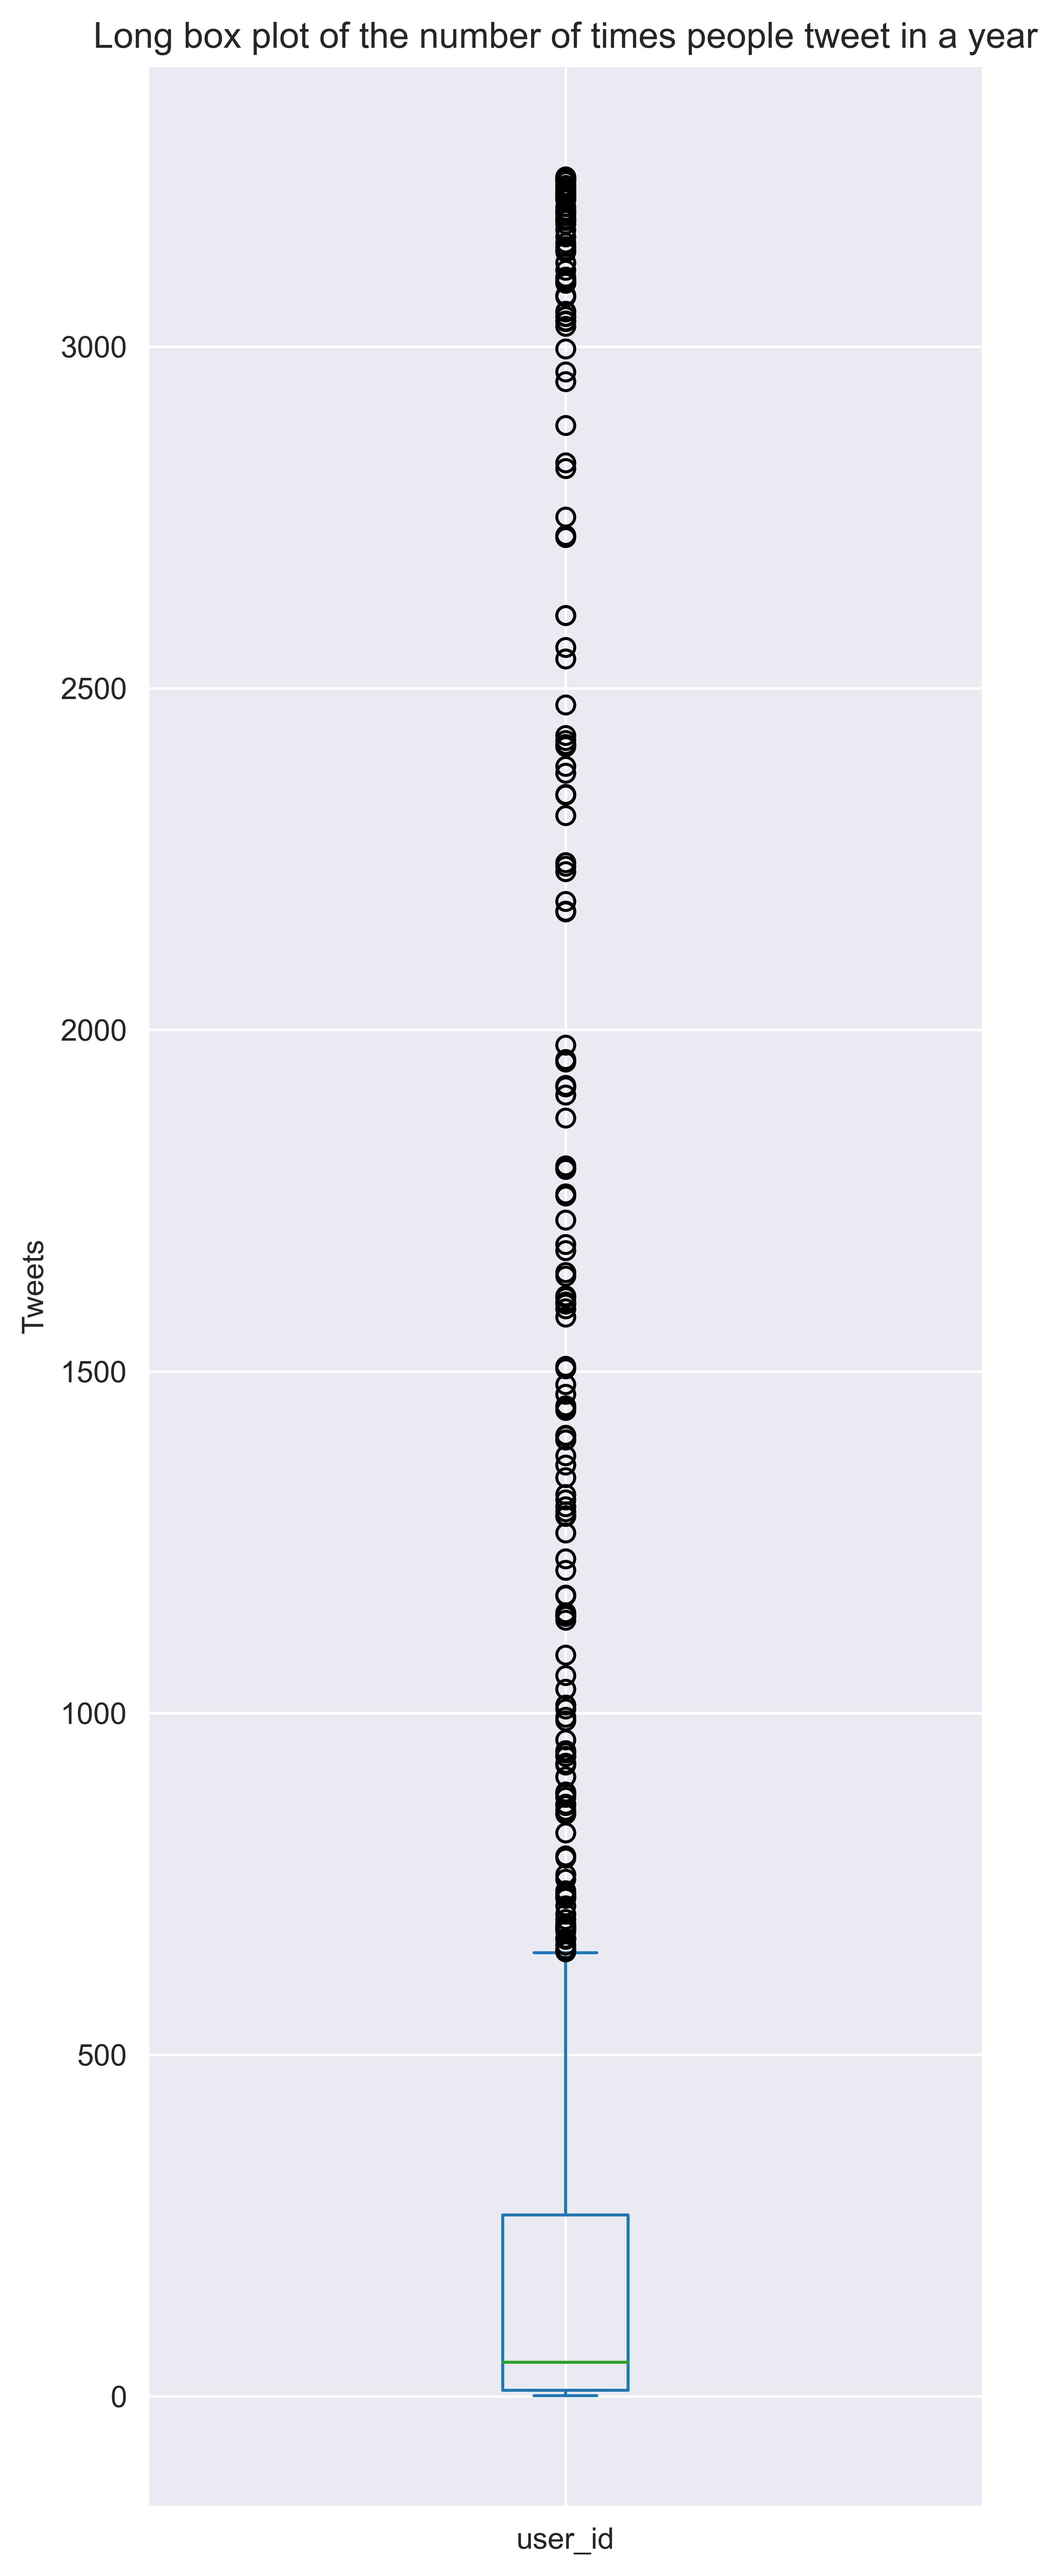

In [152]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(figsize=[5, 15], dpi=600)
plt.title("Long box plot of the number of times people tweet in a year")
plt.ylabel("Tweets")
tw.user_id.value_counts().plot.box()

#### What are the top tweeters tweeting?

In [23]:
top_users = [users for users in tw.user_id.value_counts().index[0:10]]

In [24]:
top_users_posts = []

for users in top_users:
  posts = tw[tw.user_id == users].post_content.head()
  top_users_posts.append(posts)

In [133]:
top_users_posts[0].tolist()

["'One DIY doggie pool, coming right up! '. . The new #NestCam alerts you about the important things: , , or , and  on the new #NestDoorbell.*. . Share your best Nest Cam pet videos with #CaughtOnNestCam for a chance to be featured. . . *Working internet and Wi-Fi required https://t.co/AFRCH1f2NL",
 '@anonymised_user I can help. . ',
 '@anonymised_user on telegram is really useful! https://t.co/fozOeWQR9m https://t.co/0BVrFoUq22',
 '@anonymised_user on telegram is really useful! https://t.co/ut4aekiBHH',
 '@anonymised_user YAAAAAAAAAASSSSSS']

In [134]:
top_users_posts[1].tolist()

['Using Deep Learning to extract book titles from Hacker News Comments.. Via HN [ https://t.co/3QJSCLVQ8G ]. @anonymised_user https://t.co/z8gMQ947OH',
 '@anonymised_user @anonymised_user You want more eyespots? :-). . Junonia atlites, from Singapore [ https://t.co/LjKtL8Dw0H ] https://t.co/HblXGq0z2O',
 'Three different Linux distros to keep your clothes clean like gnu! https://t.co/IHaI99YvjV',
 'Prominent Moths, Notodontidae. Phalera raya[?]https://t.co/JO4xkVUsE7. Damata longipennis[?]https://t.co/EI6pgOvEq7. Netria multispinae https://t.co/Pee0BTbWuv. Tarsolepis taiwana https://t.co/C5ZeYmhtpk. #insect #China #Yunnan #Lepidoptera #moth #entomology #itchydogimages https://t.co/a6l50rOqew',
 'Chloephorinae, Nolidae. Tortriciforma sp. https://t.co/iXYbV9KoAt. Titulcia eximia https://t.co/z3aWEm4RuP. Carea angulata https://t.co/plh93tUVbo. Tyana marina https://t.co/fpnxY5g7ZR. #insect #China #Yunnan #Lepidoptera #moth #entomology #itchydogimages https://t.co/vxIreH65xs']

In [135]:
top_users_posts[3].tolist()

['@anonymised_user @anonymised_user @anonymised_user @anonymised_user',
 '@anonymised_user @anonymised_user Ni Men Zhen De Hui Shuo Pu Tong Hua Huan Shi Du Yong Gu Ge Fan Yi ?',
 "@anonymised_user '1.07% down' ",
 '@anonymised_user @anonymised_user Omg',
 "@anonymised_user I realised this too. They don't even deserve the power of gold "]

In [28]:
top_users_posts[6].iloc[0]

'Snap work-from-home rules for offices eased https://t.co/J3gcAL4YnE'

#### Does it affect our analysis?

Except for the absolute top poster and maybe some others, it does not look like the top posters are posting spams. This is in line with the nature of Twitter where posting many tweets in a day is not unorthodox. We feel safe to include all these users.

### Segment demographics?

<AxesSubplot:title={'center':'Simple bar plot of segment demographics in Twitter'}, ylabel='Count'>

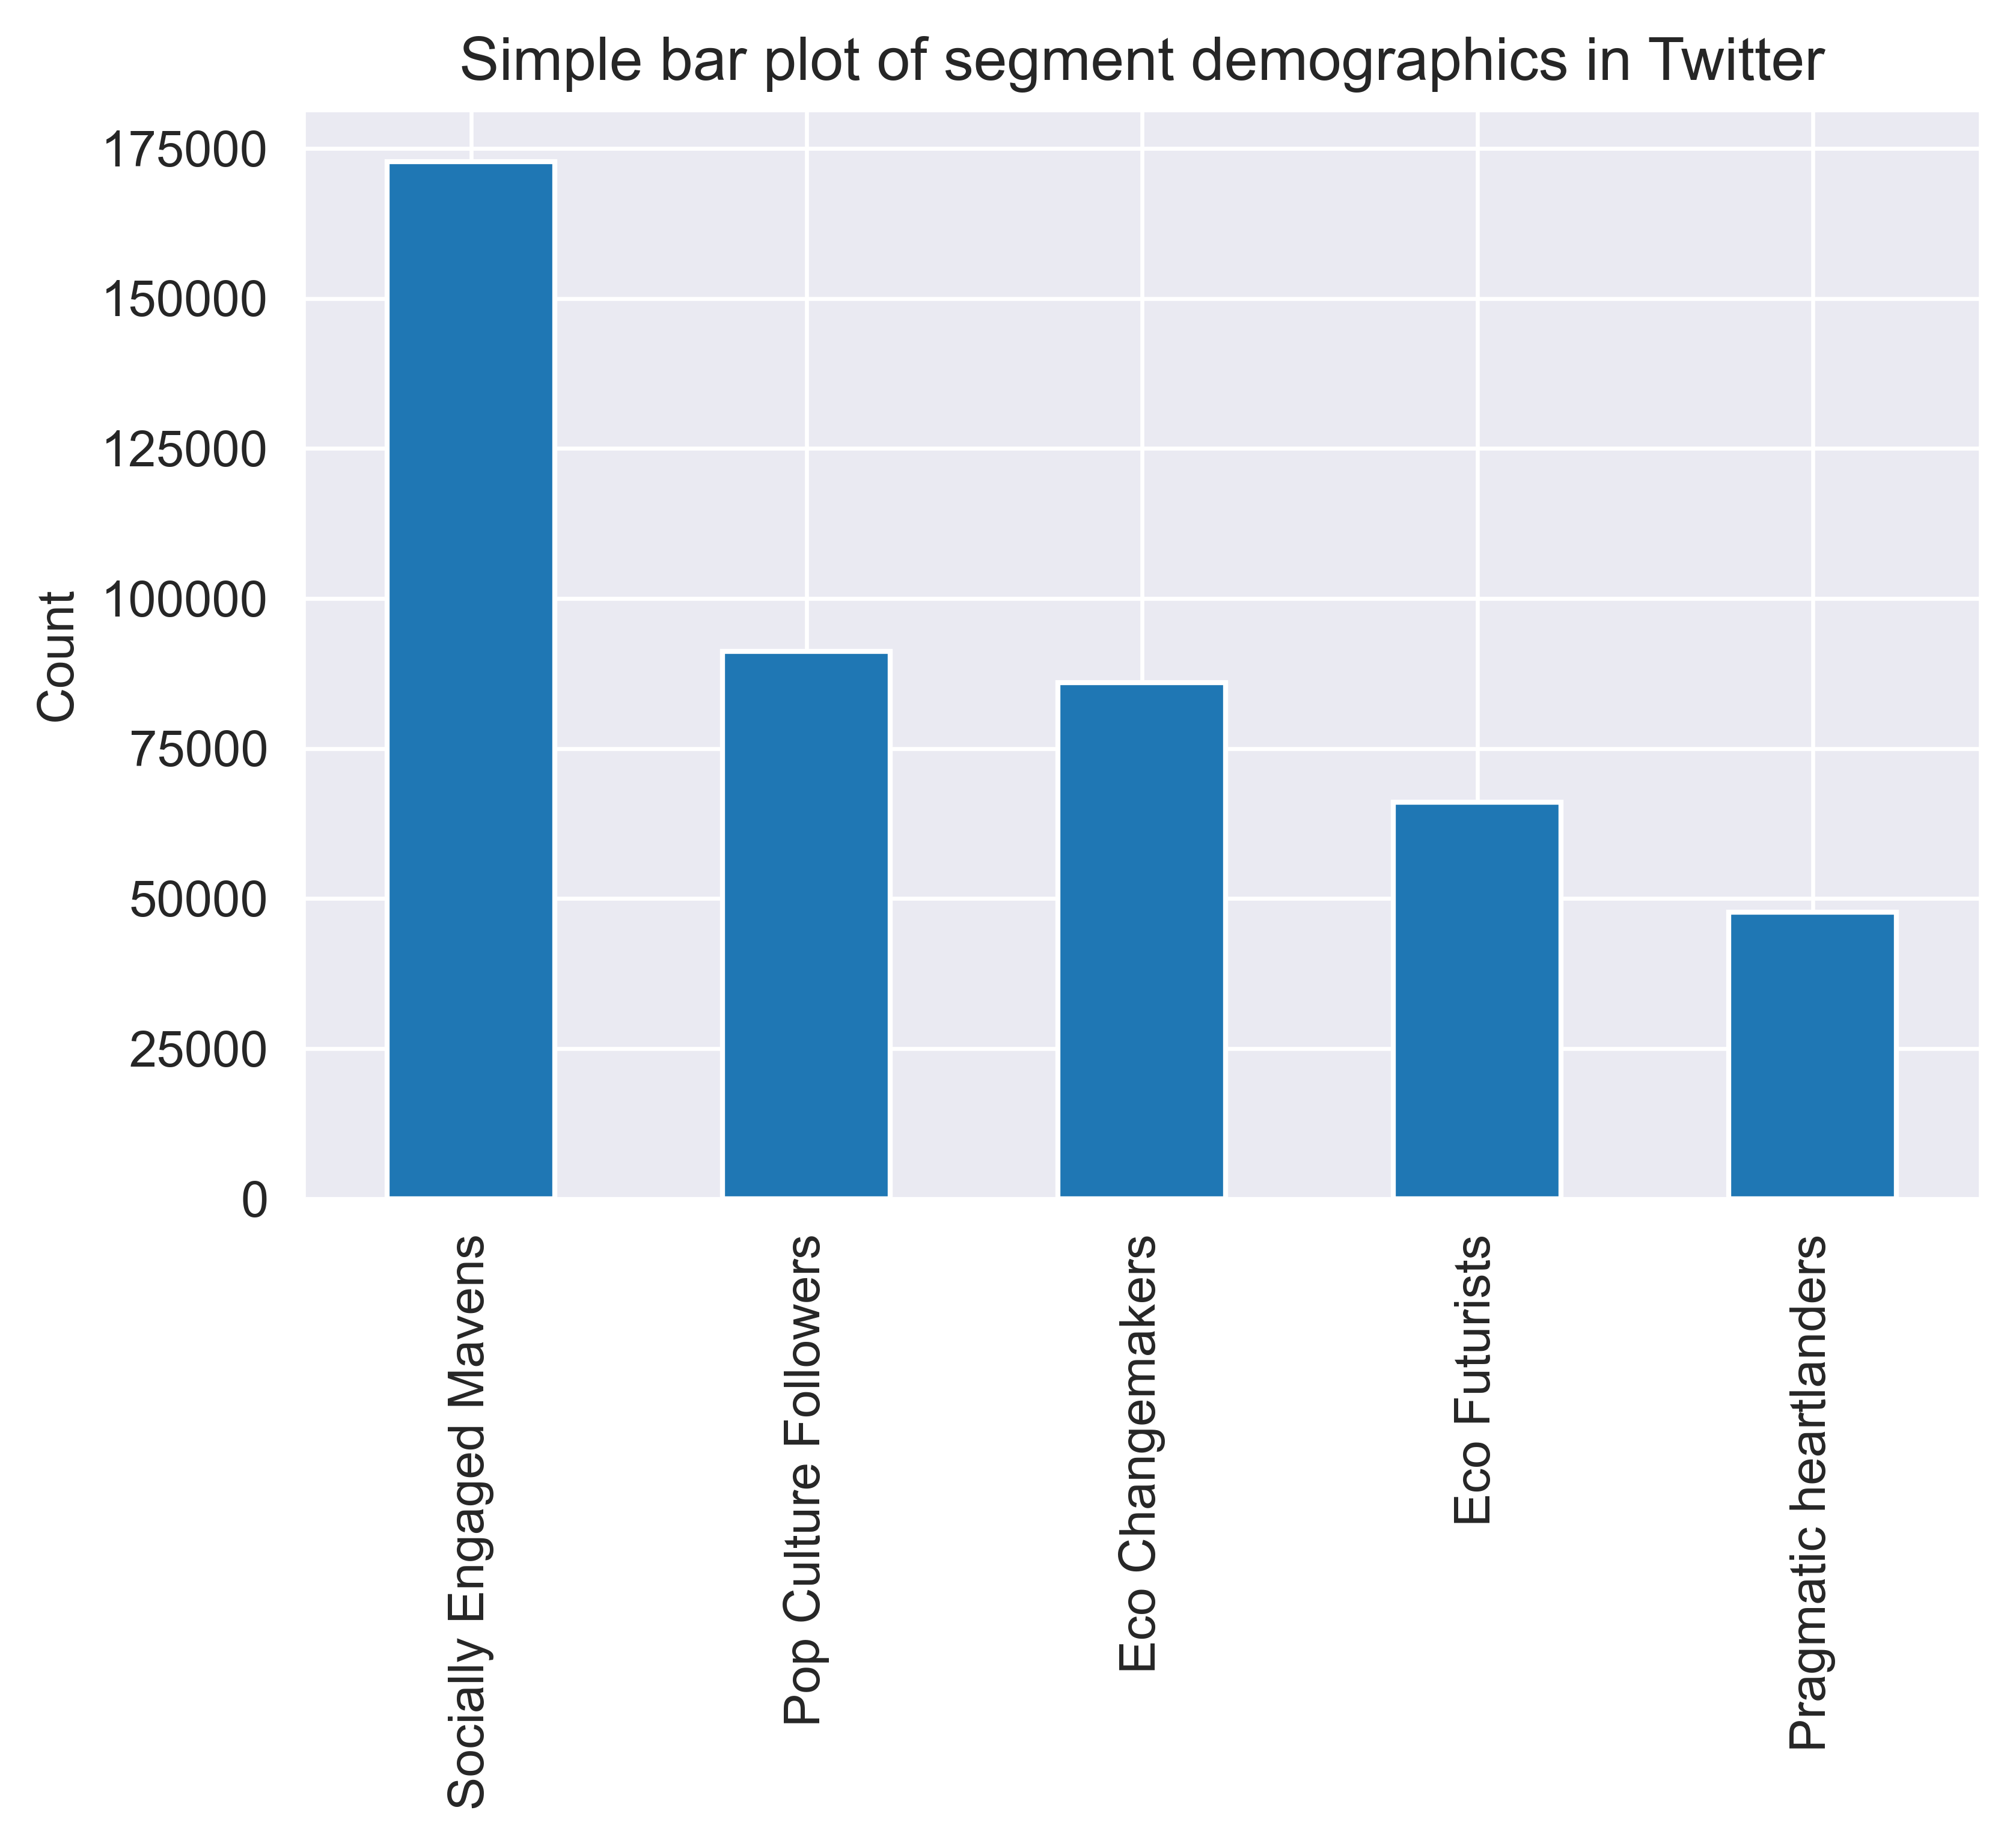

In [148]:
import matplotlib.pyplot as plt

plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(dpi=600)
plt.title("Simple bar plot of segment demographics in Twitter")
plt.ylabel("Count")
tw.segment_name.value_counts().plot.bar()

### Hashtags

In [30]:
# Copy, and not reference
tw_hashtag = tw.copy()

In [31]:
tw_hashtag['post_hashtags'] = tw_hashtag['post_hashtags'].str.split(pat="|")
tw_hashtag = tw_hashtag.explode('post_hashtags')

In [32]:
tw_hashtag.post_hashtags.value_counts()

-1                         375603
WhatsHappeningInMyanmar     10540
Singapore                    3592
Bitcoin                      2249
COVID19                      2175
                            ...  
JusticeForDaunteWright          1
HappyBirthdayJONGHYUN           1
fruitsbasket                    1
taeyong                         1
whipmyhairbackandforth          1
Name: post_hashtags, Length: 53197, dtype: int64

In [33]:
# Percentage of tweets with hashtags
1 - (tw.post_hashtags.value_counts()[0] / tw.post_hashtags.value_counts().sum())

0.19018789819216708

In [34]:
# Number of tweets with hashtags
tw.post_hashtags.value_counts()[1:].sum()

88212

We have a lot of very current affairs-esque hashtags, from the Myanmar Coup to the COVID-19 pandemic. Only around 19% of the tweets have hashtags, though.

#### Finding keywords in hashtags

Let us try finding `food` or something similar to it in the list of hashtags.

In [35]:
# tw_hashtag[tw_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*$')] \
#   .post_hashtags.value_counts() \
#   .to_csv('food_regex_tw_hashtags.csv')

tw_hashtag[tw_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*$')] \
  .post_hashtags.value_counts()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/2508856565.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw_hashtag[tw_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*$')] \


food               157
APACAgriFood       113
foodie             112
foodstagram         89
foodphotography     88
                  ... 
fastfood             1
FoodImperialism      1
ProcessedFood        1
JunkFood             1
foodtherapy          1
Name: post_hashtags, Length: 299, dtype: int64

In [36]:
tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*$')] \
  .post_hashtags.value_counts().sum()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/3841676293.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*$')] \


940

Let us find out if there are explicit hashtags on food wastage or food surplus.

In [37]:
tw_hashtag[tw_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
  .post_hashtags.value_counts()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/3290578401.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw_hashtag[tw_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


foodwaste              15
FoodWaste               5
FoodWasteActionWeek     2
StopFoodWasteDay        2
FightFoodWaste          1
FoodWasteIndex          1
LoveFoodHateWaste       1
foodlossandwaste        1
reducefoodwaste         1
Name: post_hashtags, dtype: int64

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/1080031983.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


<AxesSubplot:title={'center':'Simple bar plot of segment demographics for filtered hashtag posts in Twitter'}, ylabel='Count'>

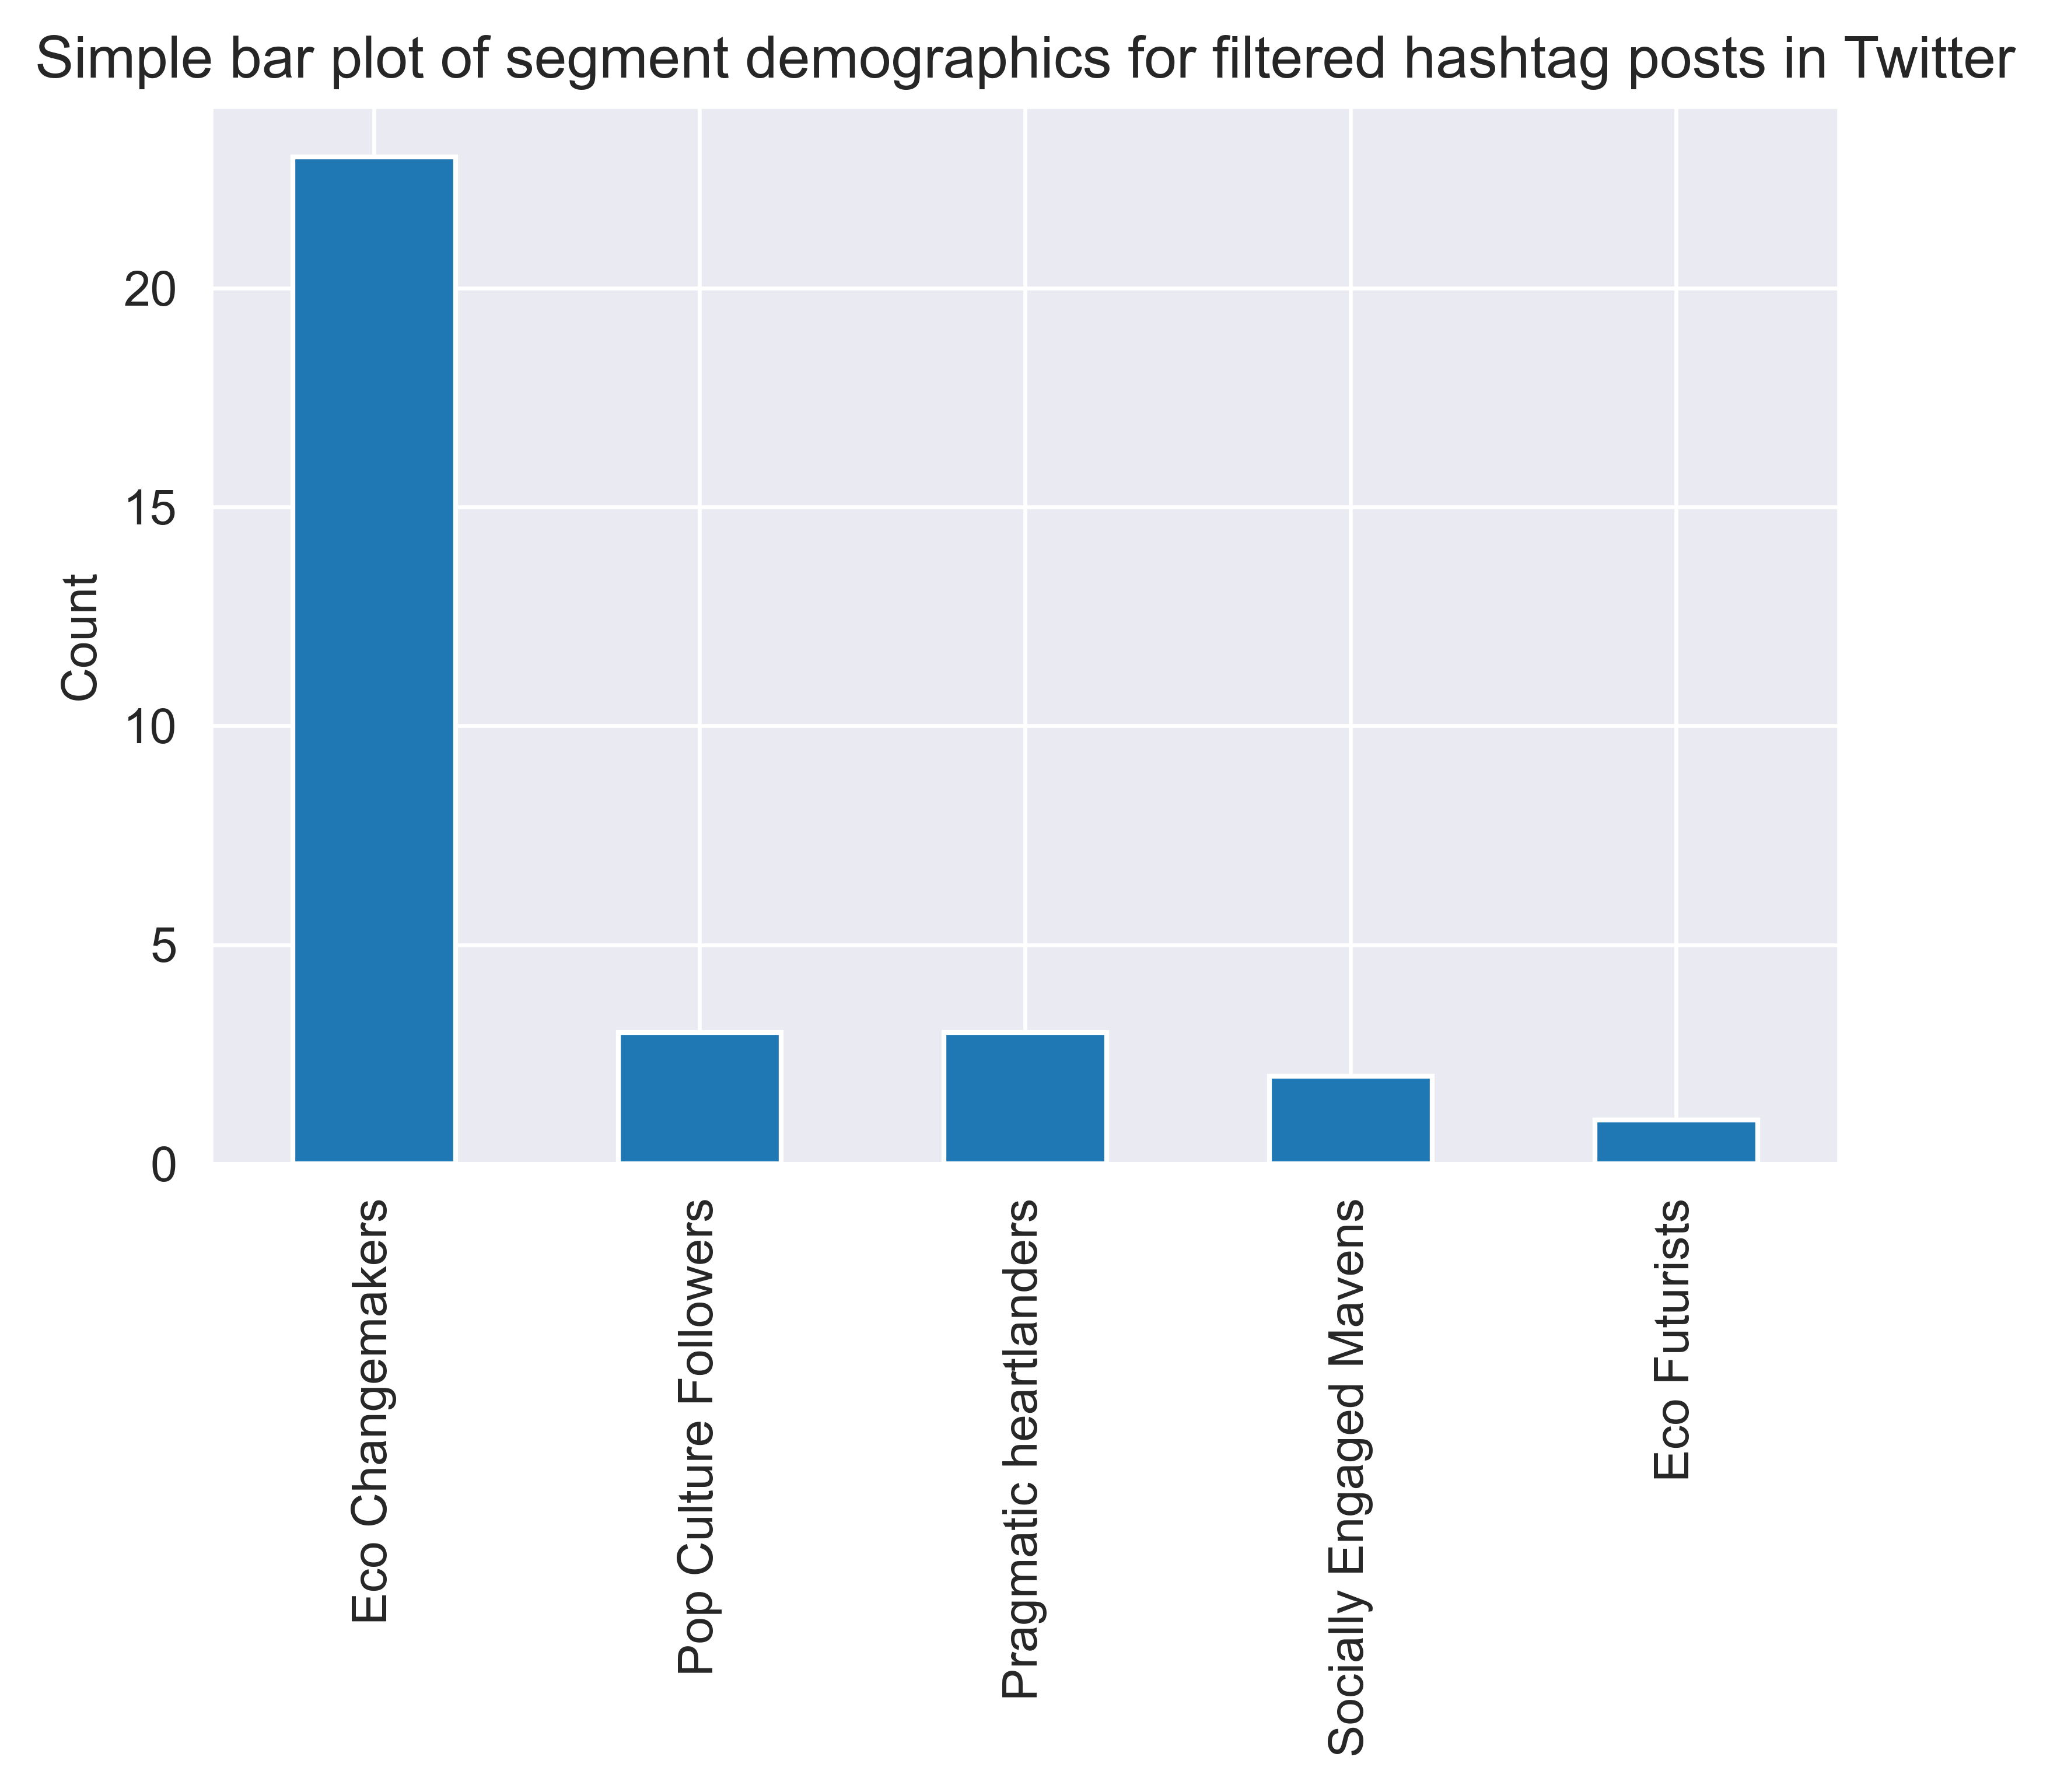

In [176]:
plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(dpi=600)
plt.title("Simple bar plot of segment demographics for filtered hashtag posts in Twitter")
plt.ylabel("Count")

tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
    .segment_name.value_counts().plot.bar()

In [39]:
tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
  .post_hashtags.value_counts().sum()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/3511705220.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


32

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/1200978372.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


<AxesSubplot:title={'center':'Simple bar plot of post media for filtered hashtag posts'}, xlabel='Media Type', ylabel='Count'>

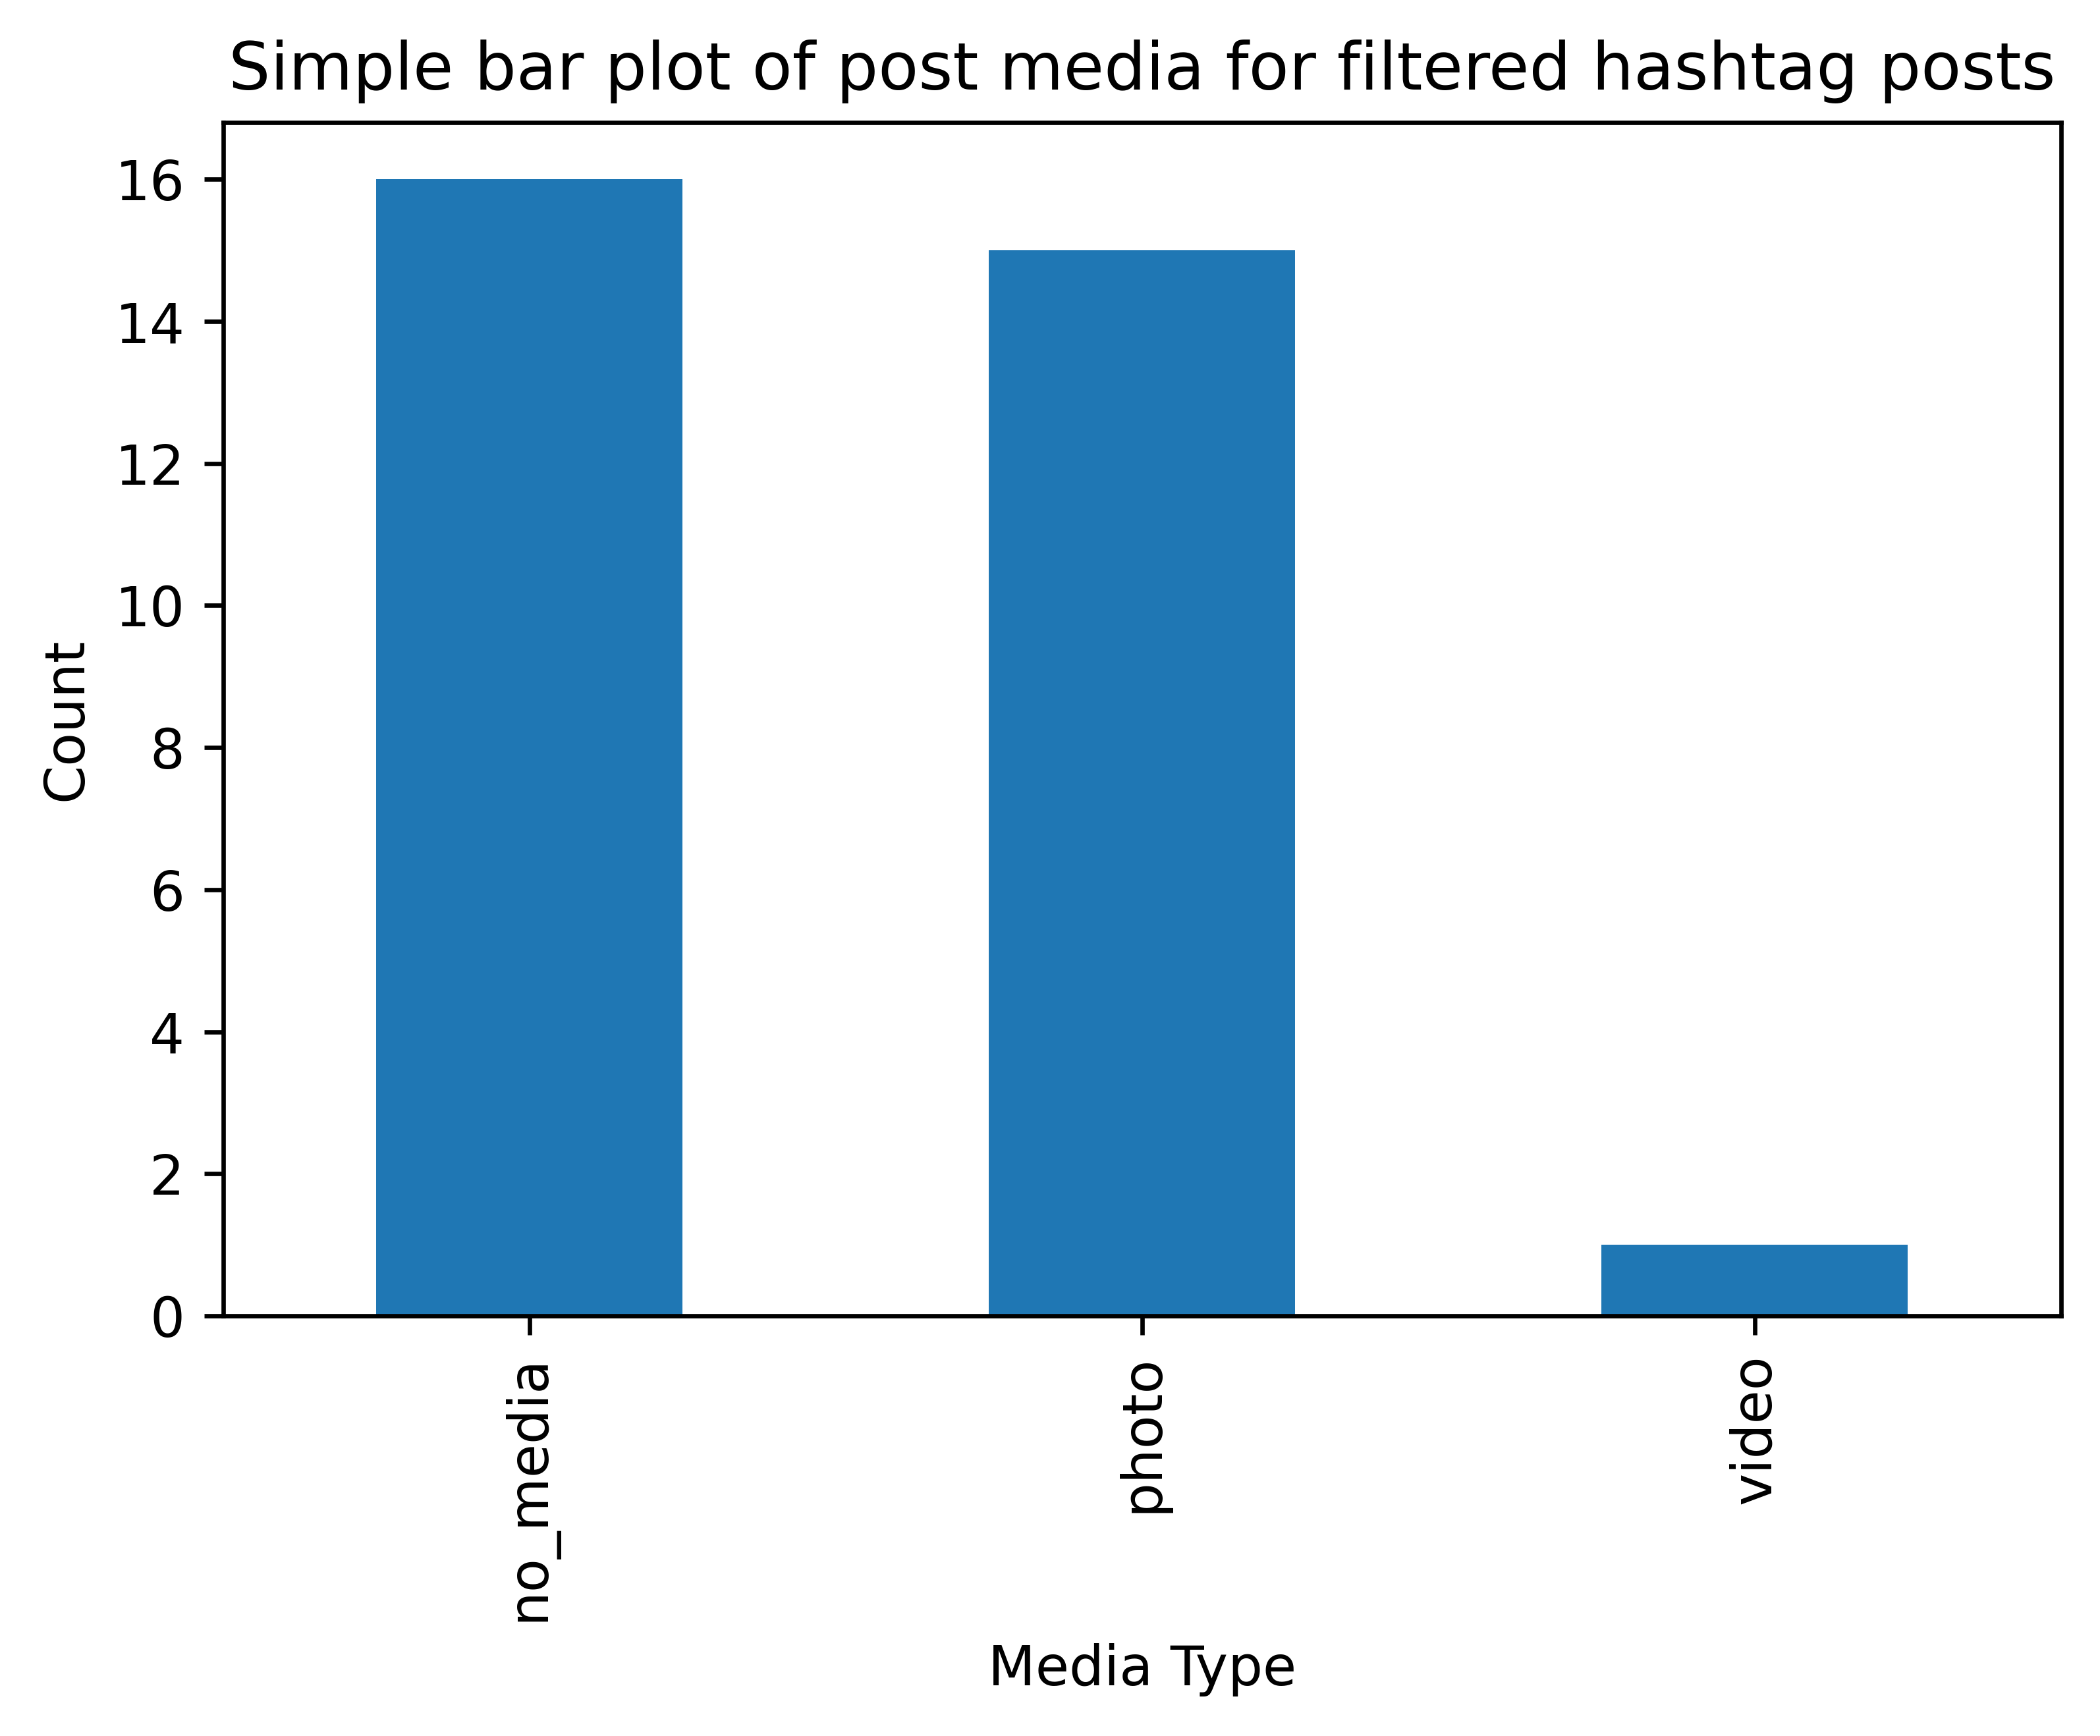

In [40]:
plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(dpi=600)
plt.title("Simple bar plot of post media for filtered hashtag posts")
plt.ylabel("Count")
plt.xlabel("Media Type")

tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
    .post_media.value_counts().plot.bar()

In [139]:
tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_content.to_csv("hashtagfiltercontent.csv")

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/3618481584.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_content.to_csv("hashtagfiltercontent.csv")


Not a whole lot there, but the percentage of hashtagged tweet is already not that high, so it's not too bad, we suppose. We can definitely take a look more into the `post_content` part.

In [41]:
tw_hashtag_content = tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_content.copy()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/1025092827.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw_hashtag_content = tw[tw.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_content.copy()


In [42]:
# Importing relevant nltk stuff for cleaning up contents with filtered hashtags
from nltk.corpus import stopwords
import nltk
import re
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincentleonardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
def remove_mentions_hashtags(x):
	x = re.sub("@\S+", " ", x)
	x = re.sub("#\S+", " ", x)
	return x

In [44]:
tw_hashtag_content = tw_hashtag_content.str.lower()
tw_hashtag_content = tw_hashtag_content.apply(remove_html_tags_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_url_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_mentions_hashtags)
tw_hashtag_content = tw_hashtag_content.apply(remove_accented_chars_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_punctuation_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_irr_char_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_extra_whitespaces_func)
tw_hashtag_content = tw_hashtag_content.apply(word_tokenize)
tw_hashtag_content = tw_hashtag_content.apply(remove_english_stopwords_func)
tw_hashtag_content = tw_hashtag_content.apply(norm_lemm_v_a_func)
tw_hashtag_content = tw_hashtag_content.apply(remove_single_char_func)

In [45]:
tw_hashtag_content.tolist()

['great haul magic bag ps',
 'need gmos fee world need drastically reduce food waste million tons food waste year would fill million ton truck bumper bumper enough circle earth seven time',
 'passionate solve issue global international programme delivery manager would able ensure portfolio project deliver provide maximum impact apply april',
 'delight announce superstar cook join nadiya know across country cook television presenter author keep eye peel two days go',
 'new publication food loss analysis tomato value chain download',
 'eat without waste contribution recently kick start waste deep study single use waste hk hospitality industry early',
 'four reason future secure chain tackle problem nutritious alternative source income farmers',
 'today officially food waste major issue need tackle order achieve creative ways cut food wastage home',
 'today share ideas avoid cook together universal croquettes foolproof anti recipe make leftovers look taste great bon appetit everyone',
 'm

In [ ]:
text_corpus = tw_hashtag_content.str.cat(sep=" ")
print(most_common_word_func(text_corpus).to_html())

### Left join replies?

In [47]:
replies = tw.copy()
replies = replies.rename(columns={"post_reply_to_post_id": "-1", "post_id": "post_reply_to_post_id", "post_content": "post_reply_to_post_content"})[['post_reply_to_post_id', 'post_reply_to_post_content']]

In [48]:
replies

post_reply_to_post_id  \
0         1439238781253550085   
1         1405849658295918594   
2         1396027145386795009   
3         1388764925808447491   
4         1377044390074404864   
...                       ...   
463810    1327585483426320386   
463811    1320883526858801154   
463812    1314518223895830530   
463813    1308704510072815619   
463814    1307581448841461761   

                               post_reply_to_post_content  
0       @anonymised_user Pah zhiam bueh pah zhiam bueh...  
1       The current active #Covid19 #clusters in #Sing...  
2       Somehow...I feel it coming. . . Judging from t...  
3       Pronunciation of AZ. . British: A-Zed. America...  
4       Since April Fools Day is fast approaching,. th...  
...                                                   ...  
463810  உங்களுக்கும் உங்கள் சுற்றத்தாருக்கும் இனிய தீப...  
463811  “The first thing I’d get rid off from my life…...  
463812  Seems like home is the best place one can pose...  
463813  *Insert pretentious caption* https://t.co/IRK9...  
463814  Some Pig Pudding folks?. @socialplacesg @ Soci...  

[463815 rows x 2 columns]

In [49]:
tw = tw.merge(replies, on='post_reply_to_post_id', how='left')

In [50]:
tw[tw['post_reply_to_post_content'].notna()]['post_reply_to_post_content'].tolist()

["@syakirmoharum It's quite unique in Chinese Singaporean tho. I don't see people speaking Malay or Tamil being accused of very 'Malaysian' or 'Indian', maybe cause Malay is our national language and the Tamil Indians are a minority and cherish their culture even more.",
 "@syakirmoharum I believe in the past we used to aggressively promote the use of proper English and by speaking good English we can have a better future, job, connect with the world all that and speaking mother tongue 'impedes' progress",
 '@anonymised_user Happy birthday ',
 '@anonymised_user @anonymised_user Carlton not bad also',
 '先日読んだ在星外国人駐在の平均年収はちょっと割増しな気がしたけど、今回のシンガポール人の収入に関するコレは、逆に設定が低すぎるような気がするなぁ…🥺🤔. . Ever Wondered How Much Your Doctor and Lawyer Friends Earn? https://t.co/xesD9SMaxj',
 '@anonymised_user Ge Ren noXin Tiao yaShi Qing deDa chitakunaiDa tenai, toiuSheng haWu Lun arimasuga, Suo Wei hueikudanandatoiuYin Mou Lun ha, zerodatohaSi imasenga, Si niJian eruFan Wei dehariarubachiyaruBing setehotondoJia

### Types of

### Combining tweets from a single person

In [51]:
tw_grp_by_users = tw.copy()

In [52]:
tw_grp_by_users

user_id  \
0       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
1       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
2       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
3       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
4       92c7f7363deda546240a9b63d8a279d22c3f018329cd2a...   
...                                                   ...   
463810  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463811  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463812  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463813  58818f81004612944d302a14d4efccd9d5333b8f63819c...   
463814  58818f81004612944d302a14d4efccd9d5333b8f63819c...   

                                          user_name              post_id  \
0                spiked-determined-dragonfly-of-awe  1439238781253550085   
1       congenial-porcupine-of-pragmatic-enrichment  1405849658295918594   
2                    rebel-hissing-waxbill-of-pride  1396027145386795009   
3               stoic-psychedelic-squirrel-of-vigor  1388764925808447491   
4                 handsome-famous-cassowary-of-glee  1377044390074404864   
...                                             ...                  ...   
463810       smiling-friendly-dalmatian-of-infinity  1327585483426320386   
463811           macho-rebel-mackerel-of-masquerade  1320883526858801154   
463812              grumpy-hypersonic-clam-of-vigor  1314518223895830530   
463813   fresh-prehistoric-jaguarundi-of-virtuosity  1308704510072815619   
463814          furry-crouching-mayfly-of-satiation  1307581448841461761   

                 post_date                                       post_content  \
0      2021-09-18 14:43:59  @anonymised_user Pah zhiam bueh pah zhiam bueh...   
1      2021-06-18 11:27:32  The current active #Covid19 #clusters in #Sing...   
2      2021-05-22 08:56:23  Somehow...I feel it coming. . . Judging from t...   
3      2021-05-02 07:58:54  Pronunciation of AZ. . British: A-Zed. America...   
4      2021-03-30 23:45:41  Since April Fools Day is fast approaching,. th...   
...                    ...                                                ...   
463810 2020-11-14 12:13:39  உங்களுக்கும் உங்கள் சுற்றத்தாருக்கும் இனிய தீப...   
463811 2020-10-27 00:22:28  “The first thing I’d get rid off from my life…...   
463812 2020-10-09 10:49:01  Seems like home is the best place one can pose...   
463813 2020-09-23 09:47:24  *Insert pretentious caption* https://t.co/IRK9...   
463814 2020-09-20 07:24:45  Some Pig Pudding folks?. @socialplacesg @ Soci...   

        post_is_retweet  post_is_truncated  post_like_count  \
0                     0                  0                0   
1                     1                  0                0   
2                     1                  0                0   
3                     1                  0                0   
4                     1                  0                0   
...                 ...                ...              ...   
463810                0                  0                0   
463811                0                  0                0   
463812                0                  0                0   
463813                0                  0                0   
463814                0                  0                0   

        post_retweet_count post_media  \
0                        0   no_media   
1                       70      photo   
2                      117   no_media   
3                       15   no_media   
4                    47840      photo   
...                    ...        ...   
463810                   0   no_media   
463811                   0   no_media   
463812                   0   no_media   
463813                   0   no_media   
463814                   0   no_media   

                                        post_hashtags post_user_mentions  \
0                                                  -1                 -1   
1                          Co

In [53]:
# tw_grp_by_users = tw_grp_by_users['user_id', 'post_content', 'segment_name'] \
#     .groupby(['user_id', 'segment_name']) \
#     .agg({'post_content': lambda x: x.tolist()})

# tw_grp_by_users

# Doc2Vec Experimentation

## Languages :/

We wished that we can handle non-English text, but sadly we will have to close the model off to other languages. Hoping that we can get more experience so that we can play with other languages too.

In [54]:
# import spacy
# from spacy.language import Language
# from spacy_langdetect import LanguageDetector

# def get_lang_detector(nlp, name):
#     return LanguageDetector()

# nlp = spacy.load("en_core_web_sm")
# Language.factory("language_detector", func=get_lang_detector)
# nlp.add_pipe('language_detector', last=True)

In [55]:
# text = 'This is an english text.'
# doc = nlp(text)
# print(doc._.language['language'])

In [56]:
# languages = []

# for i in tw.post_content.to_string():
#     doc = nlp(i)
#     if doc._.language:
#         languages.append(doc._.language['language'])
#     else:
#         languages.append('unknown')

Using Spacy LanguageDetector() ended up being quite slow. Instead, we will just filter out the words first.

In [88]:
tw_w2v = tw.copy()

In [58]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
import lxml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
from nltk.corpus import stopwords
import re
# from bs4 import BeautifulSoup

# load a list of stop words
nltk.download('stopwords')


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
	"""
		text: a string 
		return: modified initial string
	"""
	# text = BeautifulSoup(text, 'html.parser').text # HTML decoding
	text = text.lower() # lowercase text
	text = re.sub("@\S+", " ", text)
	text = re.sub("#\S+", " ", text)
	text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
	text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
	text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
	return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincentleonardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
tw_w2v = tw_w2v[tw_w2v.post_content.notnull()]
# tw_w2v = tw_w2v[tw_w2v.post_content.str.contains('^.*((f|F)ood.*((w|W)ast|(s|S)urplus|.*)|(e|E)at|(I|i)ngredient).*$')]
tw_w2v = tw_w2v[tw_w2v.post_content.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')]

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/336947123.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tw_w2v = tw_w2v[tw_w2v.post_content.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')]


In [91]:
tw_w2v.post_content = tw_w2v.post_content.str.lower()
tw_w2v.post_content = tw_w2v.post_content.apply(remove_html_tags_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_url_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_mentions_hashtags)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_accented_chars_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_punctuation_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_irr_char_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_extra_whitespaces_func)
tw_w2v.post_content = tw_w2v.post_content.apply(word_tokenize)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_english_stopwords_func)
tw_w2v.post_content = tw_w2v.post_content.apply(norm_lemm_v_a_func)
tw_w2v.post_content = tw_w2v.post_content.apply(remove_single_char_func)

In [115]:
text_corpus = tw_w2v.post_content.str.cat(sep=" ")
most_common_word_func(text_corpus)

Word  Frequency
1              food        162
2             waste        135
67           reduce         26
294             day         15
77             need         15
19              eat         13
130            much         12
244         package         12
159              go         12
146            join         12
192             use         12
458       singapore         11
112  sustainability         11
105            make         11
114             via         11
199             new         10
187         plastic          9
306         problem          9
238              us          9
457       challenge          8
68             loss          8
167            read          8
523            help          8
47            issue          8
598          change          8

In [131]:
tw_w2v.post_content.tolist()

['turn food waste compost one many simple ways celebrate must work together build sustainable planet future generations lhl',
 'sunnah eat wash hand start bismillah eat together eat right hand eat side critisize food waste food avoid overeat lick finger finish praise allah',
 'china bring law food waste fin promote overeat',
 'raise series fund exist investors remain commit solve issue around food waste agri fintech',
 'may come different shape size carrot carrot judge produce often may perfect eat often discard shape size give ugly fruit vegetables chance reduce food loss waste',
 'watch maggots turn food waste money',
 'great haul magic bag ps',
 'need gmos fee world need drastically reduce food waste million tons food waste year would fill million ton truck bumper bumper enough circle earth seven time',
 'young filipino inventor international engineer contest invention harvest energy material make food waste',
 'watch maggots turn food waste money',
 'watch maggots turn food waste m

In [66]:
from tqdm import tqdm
from gensim.models import doc2vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [67]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [92]:
all_data = label_sentences(tw_w2v.post_content, 'Train')

In [97]:
model_dbow = doc2vec.Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, 
                     min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 134/134 [00:00<00:00, 592865.76it/s]


In [98]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), 
                     total_examples=len(all_data), 
                     epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 134/134 [00:00<00:00, 2867534.37it/s]


In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
# sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
	""" Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
	its list of most similar words, and a list of words.
	"""
	arrays = np.empty((0, 300), dtype='f')
	word_labels = [word]
	color_list  = ['red']

	# adds the vector of the query word
	arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
	
	# gets list of most similar words
	close_words = model.wv.most_similar([word])
	
	# adds the vector for each of the closest words to the array
	for wrd_score in close_words:
		wrd_vector = model.wv.__getitem__([wrd_score[0]])
		word_labels.append(wrd_score[0])
		color_list.append('blue')
		arrays = np.append(arrays, wrd_vector, axis=0)
	
	# adds the vector for each of the words from list_names to the array
	for wrd in list_names:
		wrd_vector = model.wv.__getitem__([wrd])
		word_labels.append(wrd)
		color_list.append('green')
		arrays = np.append(arrays, wrd_vector, axis=0)
		
	# Reduces the dimensionality from 300 to 50 dimensions with PCA
	reduc = PCA(n_components=20).fit_transform(arrays)
	
	# Finds t-SNE coordinates for 2 dimensions
	np.set_printoptions(suppress=True)
	
	Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
	
	# Sets everything up to plot
	df = pd.DataFrame({'x': [x for x in Y[:, 0]],
					   'y': [y for y in Y[:, 1]],
					   'words': word_labels,
					   'color': color_list})
	
	fig, _ = plt.subplots()
	fig.set_size_inches(9, 9)
	
	# Basic plot
	p1 = sns.regplot(data=df,
					 x="x",
					 y="y",
					 fit_reg=False,
					 marker="o",
					 scatter_kws={'s': 40,
								  'facecolors': df['color']
								 }
					)
	
	# Adds annotations one by one with a loop
	for line in range(0, df.shape[0]):
		 p1.text(df["x"][line],
				 df['y'][line],
				 '  ' + df["words"][line].title(),
				 horizontalalignment='left',
				 verticalalignment='bottom', size='medium',
				 color=df['color'][line],
				 weight='normal'
				).set_size(15)

	
	plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
	plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
			
	plt.title('t-SNE visualization for {}'.format(word.title()))

/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


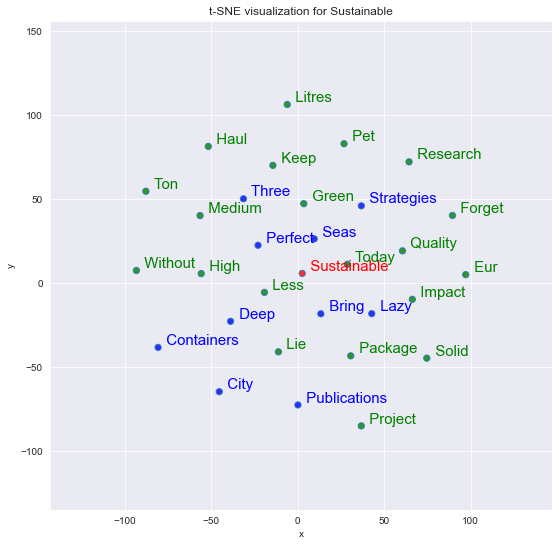

In [183]:
tsnescatterplot(model_dbow, 'sustainable',[t[0] for t in model_dbow.wv.most_similar(positive=['sustainable'], topn=30)][10:])

In [126]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
	"Creates and TSNE model and plots it"
	
#     fyi: to test specific labels instead of all the words in the vocab: 
#     labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
#     tokens = []
#     for label in labels: 
#         tokens.append(model[label])

	labels = []
	tokens = []
	

	# to speed up the process, let's limit to the first 100 elements
	count = 0
	for word in model.wv.key_to_index:
		# # store the word embeddings of the words 
		# tokens.append(model[word])
		# # keep track of the labels too so that we can plot it in the graph below
		# labels.append(word)
		if count < 100:
		    # store the word embeddings of the words 
		    tokens.append(model[word])
		    # keep track of the labels too so that we can plot it in the graph below
		    labels.append(word)
		    count = count+1

	# define the parameters of the tsne model
	tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
	
	# for the embeddings of our tokes to the tsne model
	new_values = tsne_model.fit_transform(tokens)


	# Now let's plot the tsne projects for each of the tokens in 2D
	x = []
	y = []
	for value in new_values:
		x.append(value[0])
		y.append(value[1])
		
	plt.figure(figsize=(16, 16), dpi=600) 
	for i in range(len(x)):
		plt.scatter(x[i],y[i])
		plt.annotate(labels[i],
					 xy=(x[i], y[i]),
					 xytext=(5, 2),
					 textcoords='offset points',
					 ha='right',
					 va='bottom')
	plt.show()
	
tsne_plot(model_dbow)

/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [118]:
model_dbow.wv.most_similar(positive=['much', 'food'], topn=50)

[('thrill', 0.2061573714017868),
 ('chinese', 0.19932737946510315),
 ('szue', 0.1985315978527069),
 ('foolproof', 0.1713227480649948),
 ('ytl', 0.15670666098594666),
 ('life', 0.15445931255817413),
 ('large', 0.15410348773002625),
 ('systems', 0.14913618564605713),
 ('away', 0.13977117836475372),
 ('challenge', 0.13368560373783112),
 ('anything', 0.13185729086399078),
 ('inventor', 0.1298944652080536),
 ('yes', 0.12930108606815338),
 ('since', 0.12807710468769073),
 ('restaurants', 0.1275295913219452),
 ('dunkindonuts', 0.125456303358078),
 ('indeed', 0.12541243433952332),
 ('worker', 0.12374409288167953),
 ('solar', 0.12280115485191345),
 ('inaugural', 0.11984853446483612),
 ('dole', 0.11972787976264954),
 ('cold', 0.11779835820198059),
 ('lick', 0.1143498346209526),
 ('kong', 0.11241864413022995),
 ('proteins', 0.11147388070821762),
 ('homeless', 0.10950148850679398),
 ('register', 0.10859710723161697),
 ('recap', 0.10798146575689316),
 ('nov', 0.10739397257566452),
 ('one', 0.106509

# Instagram Data

In [142]:
ig = pd.read_csv("../dataset/tsv/event_ig_p5y.tsv", sep="\t")

/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [143]:
ig

user_id  \
0       5db747f4e877ca2f15e72df13b06fd562df48403b95392...   
1       5db747f4e877ca2f15e72df13b06fd562df48403b95392...   
2       5db747f4e877ca2f15e72df13b06fd562df48403b95392...   
3       5db747f4e877ca2f15e72df13b06fd562df48403b95392...   
4       5db747f4e877ca2f15e72df13b06fd562df48403b95392...   
...                                                   ...   
404857  2f8df4c4806bcd4d9e77ccbaca985009f87665c512a717...   
404858  2f8df4c4806bcd4d9e77ccbaca985009f87665c512a717...   
404859  2f8df4c4806bcd4d9e77ccbaca985009f87665c512a717...   
404860  2f8df4c4806bcd4d9e77ccbaca985009f87665c512a717...   
404861  2f8df4c4806bcd4d9e77ccbaca985009f87665c512a717...   

                                         user_name              post_id  \
0                 stirring-elegant-hyrax-of-cubism  2612549219862254592   
1          thick-curassow-of-stimulating-authority  2579202108475507200   
2             smooth-wondrous-barracuda-of-promise  2557245600699490304   
3           hopping-nebulous-tanuki-of-improvement  2542861564795380224   
4                   enormous-booby-of-unreal-youth  2539242947717388288   
...                                            ...                  ...   
404857      vehement-therapeutic-dingo-of-chivalry  1977535085181479936   
404858          fantastic-mustard-deer-from-sirius  1966168121448222464   
404859           marvellous-sly-kittiwake-of-bliss  1959640190018156800   
404860     eccentric-narwhal-of-extreme-reputation  1954548469822102528   
404861  translucent-hissing-jackdaw-of-calibration  1951579446104596480   

       post_shortcode post_type            post_date  \
0         CRBo6xwHRNF     image  2021-07-07 12:15:58   
1         CPLKqcHnwJx     image  2021-05-22 12:01:12   
2         CN9KVMxH5-g     image  2021-04-22 04:57:32   
3         CNKDx7an2FX     image  2021-04-02 08:39:02   
4         CM9NAHpHFiX     image  2021-03-28 08:49:29   
...               ...       ...                  ...   
404857    Btxna67HSmM     image  2019-02-12 08:36:14   
404858    BtJO30_nk9A     image  2019-01-27 16:12:06   
404859    BsyCl7FnHkV     image  2019-01-18 16:02:16   
404860    Bsf83pIB5rt     image  2019-01-11 15:25:56   
404861    BsVZyqUBKAf     image  2019-01-07 13:07:00   

                                             post_caption  \
0       Collin Tomahawk . Thank you @anonymised_user f...   
1       I start to play with all kinds of ingredients ...   
2       Crocheted hand sanitizer pouches and sew token...   
3       Thank you @anonymised_user for this beautiful ...   
4       Thank you neighbour @anonymised_user and Amigo...   
...                                                   ...   
404857  sometimes its rlly discouraging to see how the...   
404858  lunch with this loser! we r dysfunctional and ...   
404859  this took me so long to post because i kept fe...   
404860  it was a struggle to even post this because th...   
404861  helluuu friends, im amanda! ◡̈ welcome to my h...   

                                        post_tagged_users post_hashtags  \
0                                                     NaN           NaN   
1                                                     NaN           NaN   
2                                                     NaN           NaN   
3                                                     NaN           NaN   
4                                                     NaN           NaN   
...                                                   ...           ...   
404857  >realfoodsg|>beautypantry.co|>xinqiannnn|>_joj...           NaN   
404858                           >well.loft|>nocarrierpls           NaN   
404859                                                NaN           NaN   
404860                                        >beyondmeat           NaN   
404861                                   >vegan|>icecream           NaN   

       post_mentions  post_comments  post_likes          segment_name  
0                NaN            0.0  

In [144]:
ig.describe()

post_id  post_comments     post_likes
count  4.048620e+05  404834.000000  404834.000000
mean   2.264287e+18       1.790536      30.327470
std    2.483175e+17       9.573386     103.558648
min    1.308317e+18       0.000000       0.000000
25%    2.123908e+18       0.000000       8.000000
50%    2.293970e+18       0.000000      18.000000
75%    2.456418e+18       2.000000      37.000000
max    2.632165e+18    3202.000000   20408.000000

In [145]:
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404862 entries, 0 to 404861
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            404862 non-null  object 
 1   user_name          404862 non-null  object 
 2   post_id            404862 non-null  int64  
 3   post_shortcode     404862 non-null  object 
 4   post_type          404862 non-null  object 
 5   post_date          404862 non-null  object 
 6   post_caption       375233 non-null  object 
 7   post_tagged_users  48617 non-null   object 
 8   post_hashtags      237954 non-null  object 
 9   post_mentions      15 non-null      object 
 10  post_comments      404834 non-null  float64
 11  post_likes         404834 non-null  float64
 12  segment_name       404834 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 40.2+ MB


<AxesSubplot:title={'center':'Simple bar plot of segment demographics in Instagram'}, ylabel='Count'>

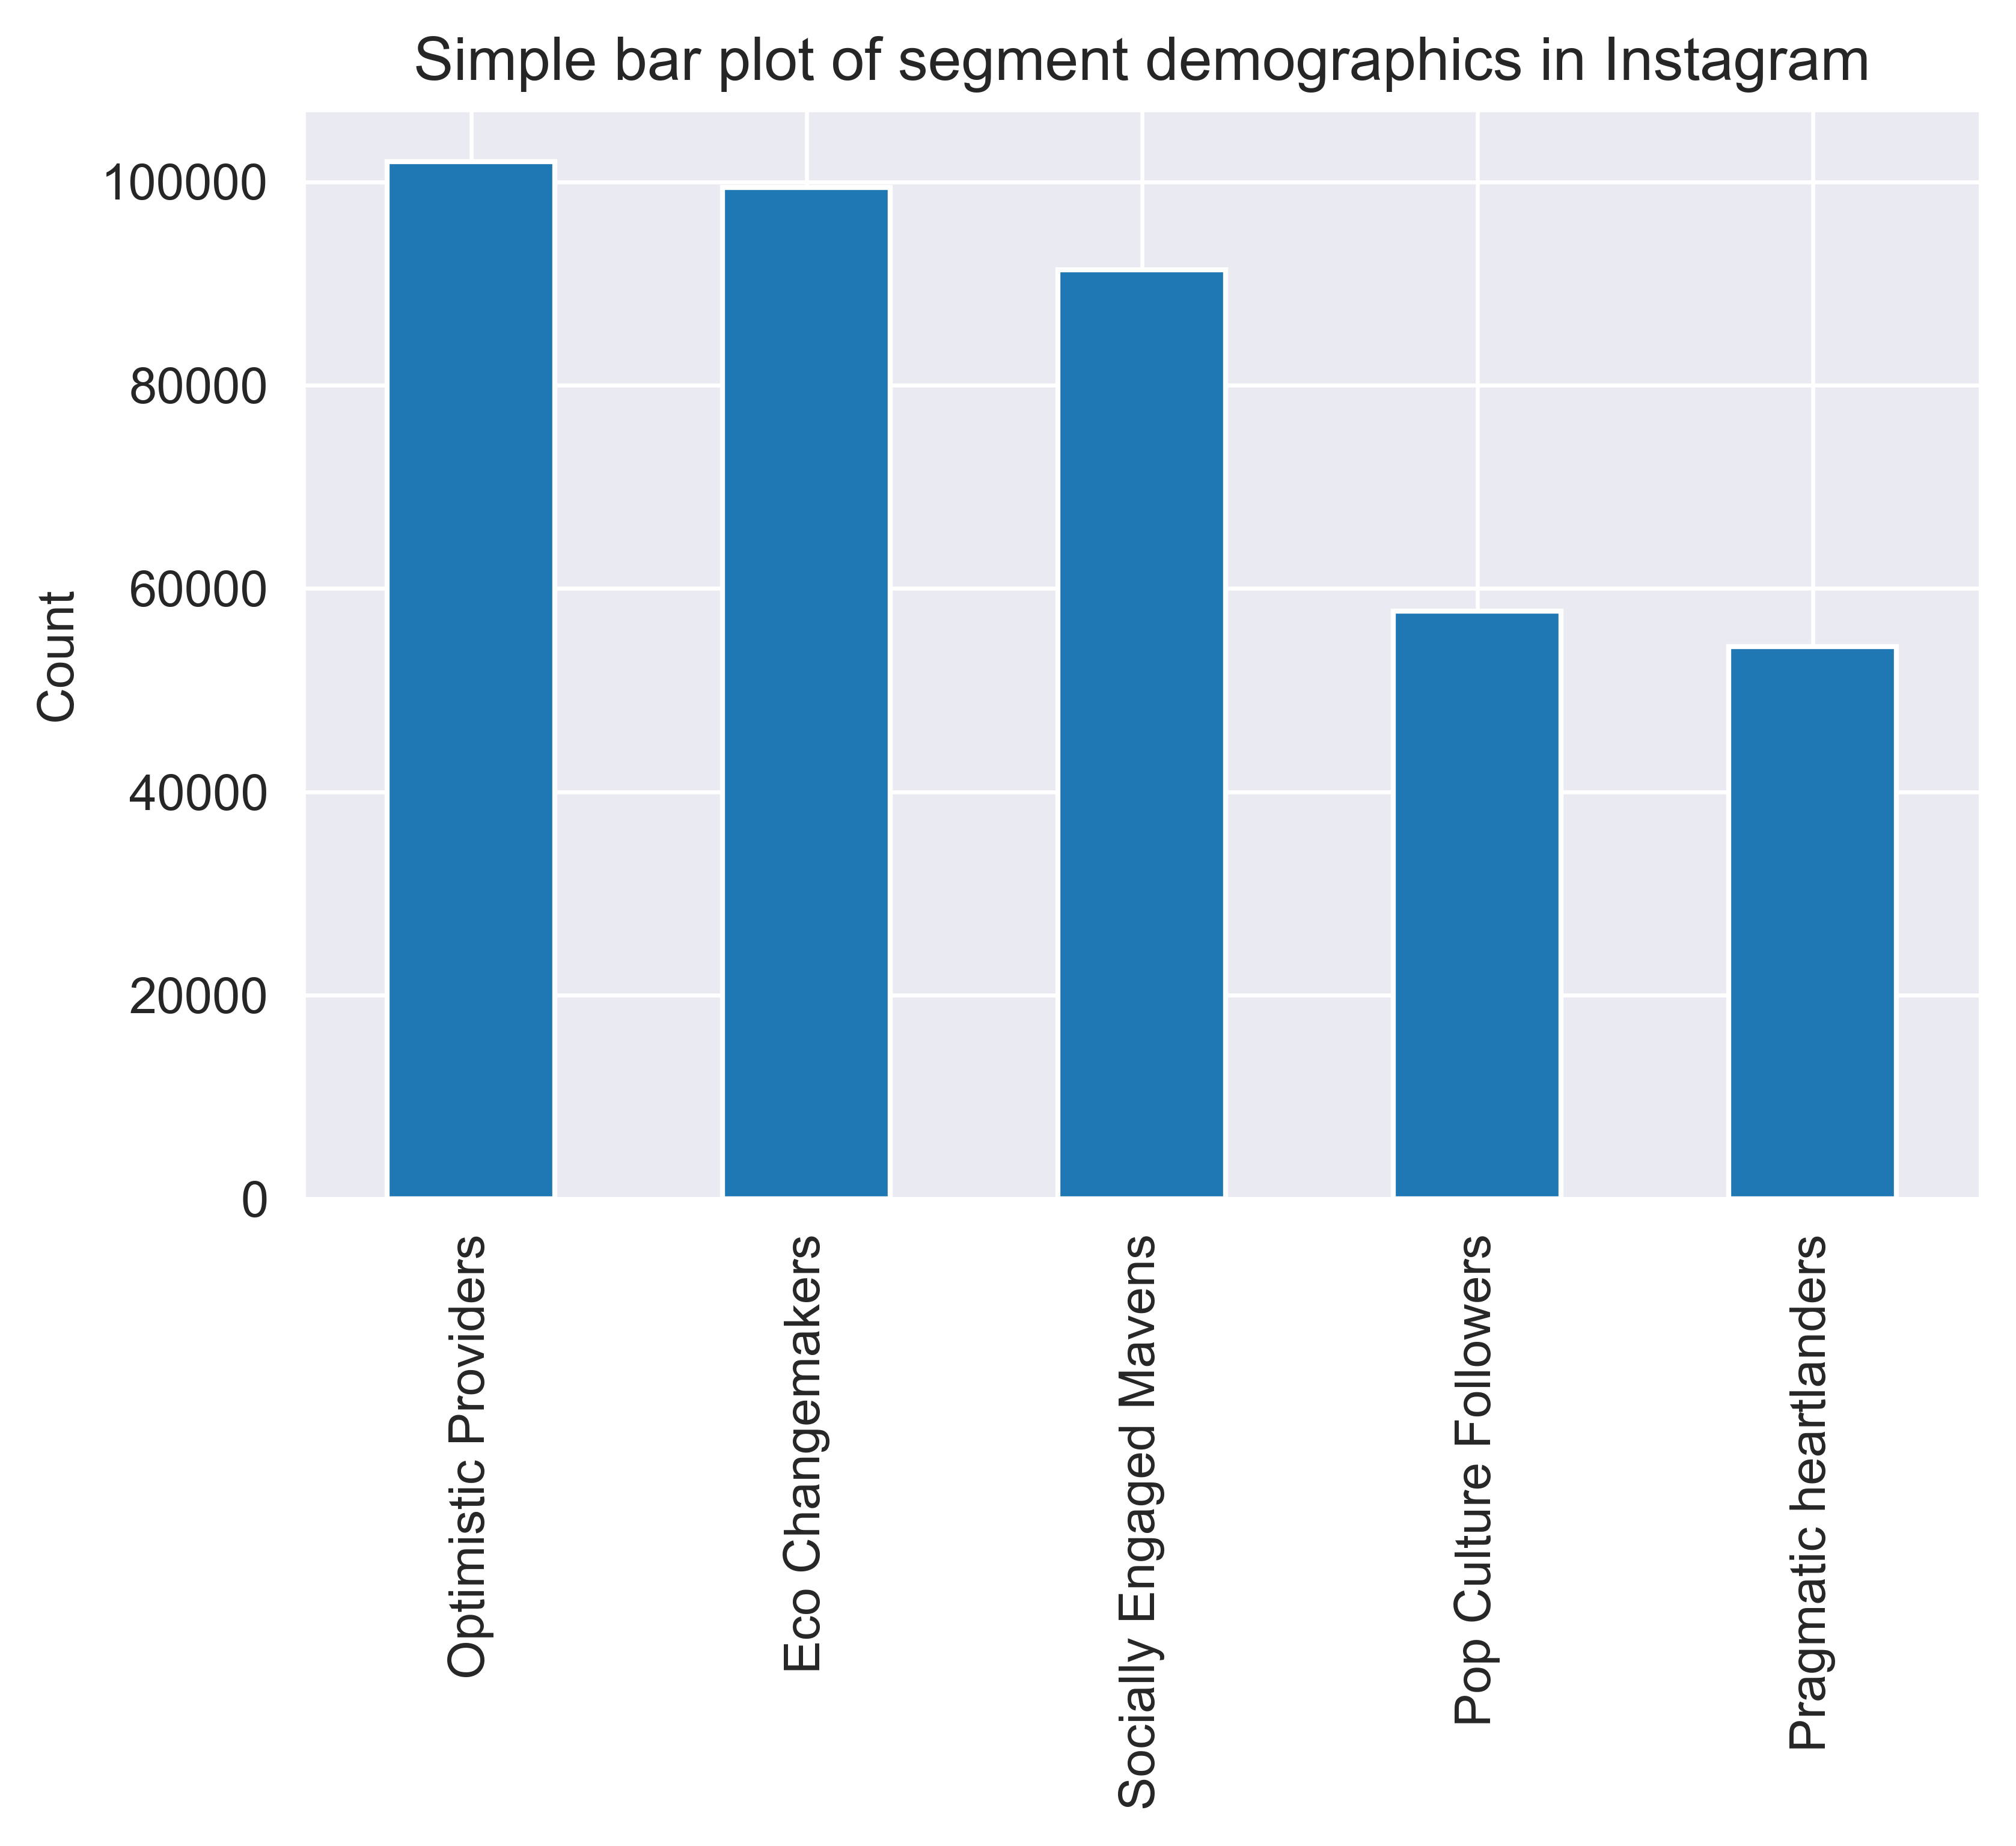

In [149]:
import matplotlib.pyplot as plt

plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(dpi=600)
plt.title("Simple bar plot of segment demographics in Instagram")
plt.ylabel("Count")
ig.segment_name.value_counts().plot.bar()

<AxesSubplot:title={'center':'Long box plot of the number of times people post on Instagram in the past five years'}, ylabel='Tweets'>

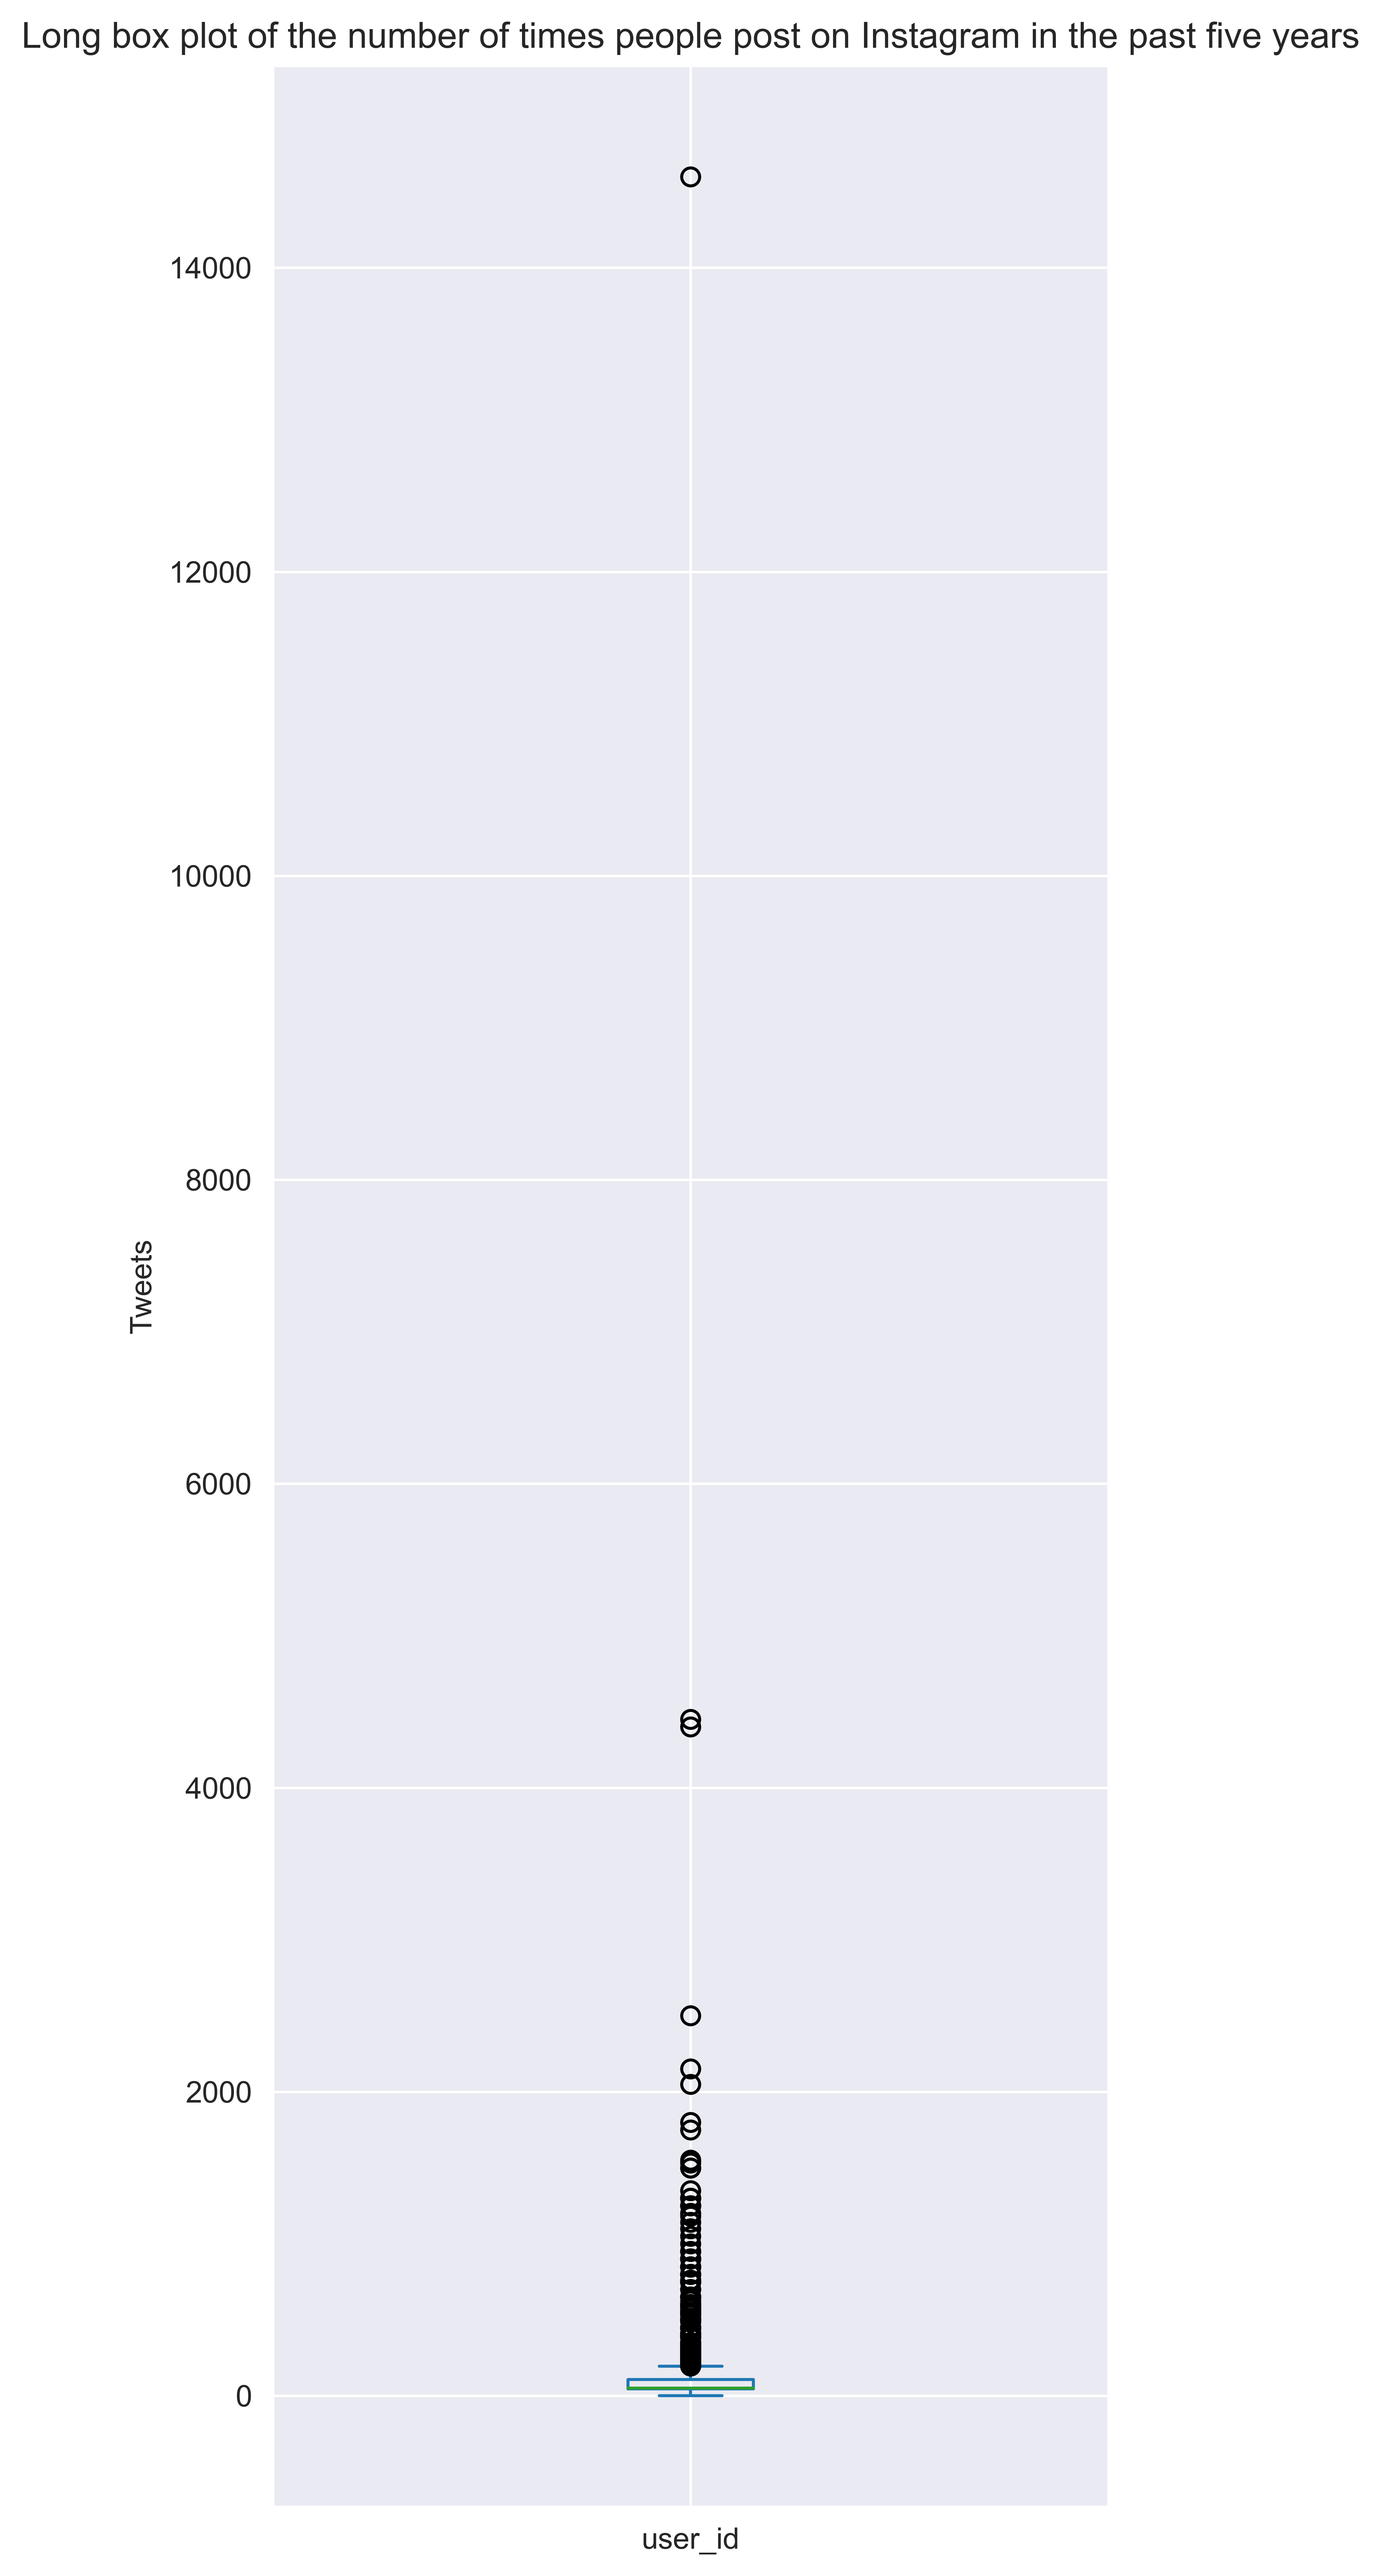

In [151]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(figsize=[5, 15], dpi=600)
plt.title("Long box plot of the number of times people post on Instagram in the past five years")
plt.ylabel("Tweets")
ig.user_id.value_counts().plot.box()

In [154]:
top_users = [users for users in ig.user_id.value_counts().index[0:10]]
top_users_posts = []

for users in top_users:
  posts = ig[ig.user_id == users].post_caption.head()
  top_users_posts.append(posts)

In [155]:
top_users_posts[0].tolist()

['Salam hujung minggu semua \n\nJom sembang santai Malam ini bersama Intan ladyana (Ambassador serilady) & Dylla Shahar (Master Stockist Singapore) seperti details dibawah:\n\nHari: Sabtu\nTarikh: 31/7/21\nMasa: 10 Pm-10:30 pm\nPlatform: instagram\n@anonymised_user\n@anonymised_user\n\n#teamIronLadyDylla \n#dyllashahar \n#youroneandonlyironlady \n#jusserilady \n#jamumodern',
 'SPECIAL EDITION \n\nNEW PACKAGING DAN NEW SCENT INSPIRED BY @anonymised_user \n\nSebelum ni seperti yg semua sedia maklum,\nkotak pink untuk wangian for her. Kotak hitam untuk wangian for him.\n\nTapi sekarang, packaging terbaru,untuk wangian SPECIAL EDITION, kotak berwajah Mua Bellaz kesayangan hampaa\n\nBONUS: DPTKAN FREE 3ml perfume dgn setiap 2 botol primadona atau Superstar.\n\nSPECIAL EDITION BELLA BY MUA BELLAZ, PRIMADONA dan SUPERSTAR dah ready stocks tau di HQ\n\nBoleh dapatkan dari semua reseller kami.\n\n#teamdvogue #perfumeparadise',
 'SPECIAL EDITION \n\nNEW PACKAGING DAN NEW SCENT INSPIRED BY @anony

In [156]:
top_users_posts[1].tolist()

['Dinner for 4, $5.,70\n\nI have been wishing to eat chicken wings for quite awhile now and today at the supermarket, I saw this frozen 2kg chicken wings @anonymised_user on promotion. \nThe wings looked good so I bought and cooked half for dinner, about 7 big pieces of chicken wings marinated with sugar, salt, wine, salt, soy sauce, thick sauce, kentucky powder and cornflour for a few hours before I air fried them @ 175 degree on 10 mins each sides.\nThe result was  but can be improved by marinating it longer hours. I will buy back the same brand of chicken wings.\n\nStir fried zuccini with dried shrimp $1.30\nChicken wings $4.00',
 'I like going to the supermarkets to explore and try new food.\n\nI stopped buying expensive avocado long time ago cause I usually never able to eat them, throwing them away @ $2.50 each. \n\nToday I decide to try again the expensive avocado since it is on promotion, buy 1 free 1 @ $8.95. Hopefully it is good experience this time. \n\nMala mini abalone, on

In [157]:
top_users_posts[2].tolist()

['@anonymised_user ',
 '@anonymised_user',
 '@anonymised_user',
 'Wah Lau so crowded !! @anonymised_user',
 'Orh nee yam cake @anonymised_user']

In [158]:
top_users_posts[3].tolist()

['Annyeong! \n\nEh tetibe jer.\nJust nak inform hari ni ada Promosi Cantik Ala-Ala Korea.\n\nDapatkan Perfect Glow Cushion Foundation Nurrayss pada harga jimat lagi hebat. \n\nDatang dalam 2 tona yang sesuai untuk semua jenis kulit Asia. Foundation yang tak berat di pipi dan mudah ditanggalkan ni memang favourite ramai. \n\nPromosi berakhir malam ni tau @anonymised_user Jangan terlepas. \n\n#nurraysaSg',
 "Today's tea break is crepe from #noshinbakes!  So sedap!  The taste is just nice, not that sweet. \n\nThank you Noshin & @anonymised_user ",
 'Kenapa nak picit jerawat bila ada sabun yang boleh kecutkan 🤭 \n\n💥 2 Hari Sahaja Peluang untuk dapatkan Nurrasya Collagen Soap with Marula Oil pada harga jimat habis. \n\n#teamfafrsg #collagensoap',
 'Dah excited nak cuba Exclusive Brightening Deodorant Mist Nurraysa? \n\nDapatkan harga pre-launch dengan penjimatan sehingga $16.80 sebotol! 😱 \n\nStocks terhad! \n\n#BrighteningDeodorantMist #NurraysaSG \n#TeamFaFrSG',
 'Siapa nak Deodorant yan

In [159]:
top_users_posts[4].tolist()

['For a friend who stays with you through these years. \n\nFrom the 1st bus ride we met & hit off at age of 17, til now being a mum of 2 kids. The noisiest pair in class, yet maybe the most admired inseparable good friends everyone is jealous of.\n\nHappy birthday to my pretty Soo Shan always! My gratitude & blessing to hv a BFF @anonymised_user like you by my side forever & ever ',
 '@anonymised_user visits 2 mornings in a row\n\n#m3sgcafe #sgcafehopping #cafesg  #cafesghopping #m3Fei Si Wo Ba  #cafesg #cafe #cafesgourmet #sgcafefood #sgcafehunt #m3myjoemylife',
 'Back to my favourite bakery  @anonymised_user\n\n#m3sgcafe #sgcafehopping #cafesg  #cafesghopping #m3Fei Si Wo Ba  #cafesg #cafe #cafesgourmet #sgcafefood #sgcafehunt',
 'Pasta  day @anonymised_user \n\n#m3sgcafe #sgcafehopping #cafesg  #cafesghopping #m3Fei Si Wo Ba  #cafesg #cafe #cafesgourmet #sgcafefood #sgcafehunt',
 '28 + me + [?][?] @anonymised_user \n\nAfter years of passing by this corner quaint cafe, I stepped into

In [168]:
ig['post_hashtags'] = ig['post_hashtags'].fillna("-1")

In [169]:
# Copy, and not reference
ig_hashtag = ig.copy()
ig_hashtag['post_hashtags'] = ig_hashtag['post_hashtags'].str.split(pat="|")
ig_hashtag = ig_hashtag.explode('post_hashtags')

In [170]:
ig_hashtag.post_hashtags.value_counts()

-1                   166908
#singapore            22228
#sgfood                6728
#nature                5587
#foodporn              4753
                      ...  
#customlogo               1
#brandmark                1
#diseño                   1
#illustrateddoris         1
#rainforst                1
Name: post_hashtags, Length: 283654, dtype: int64

In [171]:
# Percentage of tweets with hashtags
1 - (ig.post_hashtags.value_counts()[0] / ig.post_hashtags.value_counts().sum())

0.5877410080471864

In [172]:
ig_hashtag[ig_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
  .post_hashtags.value_counts()

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/3651425911.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ig_hashtag[ig_hashtag.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


#foodwaste                  255
#reducefoodwaste            208
#reducefoodwasteathome       54
#upcyclefoodwaste            54
#foodwastebingo              46
                           ... 
#saynotofoodwaste             1
#foodwastenot                 1
#upcycleyourownfoodwaste      1
#reducefoodwastetogether      1
#hkfoodwaste                  1
Name: post_hashtags, Length: 70, dtype: int64

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/2179205755.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ig[ig.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \


<AxesSubplot:title={'center':'Simple bar plot of segment demographics for filtered hashtag posts in Instagram'}, ylabel='Count'>

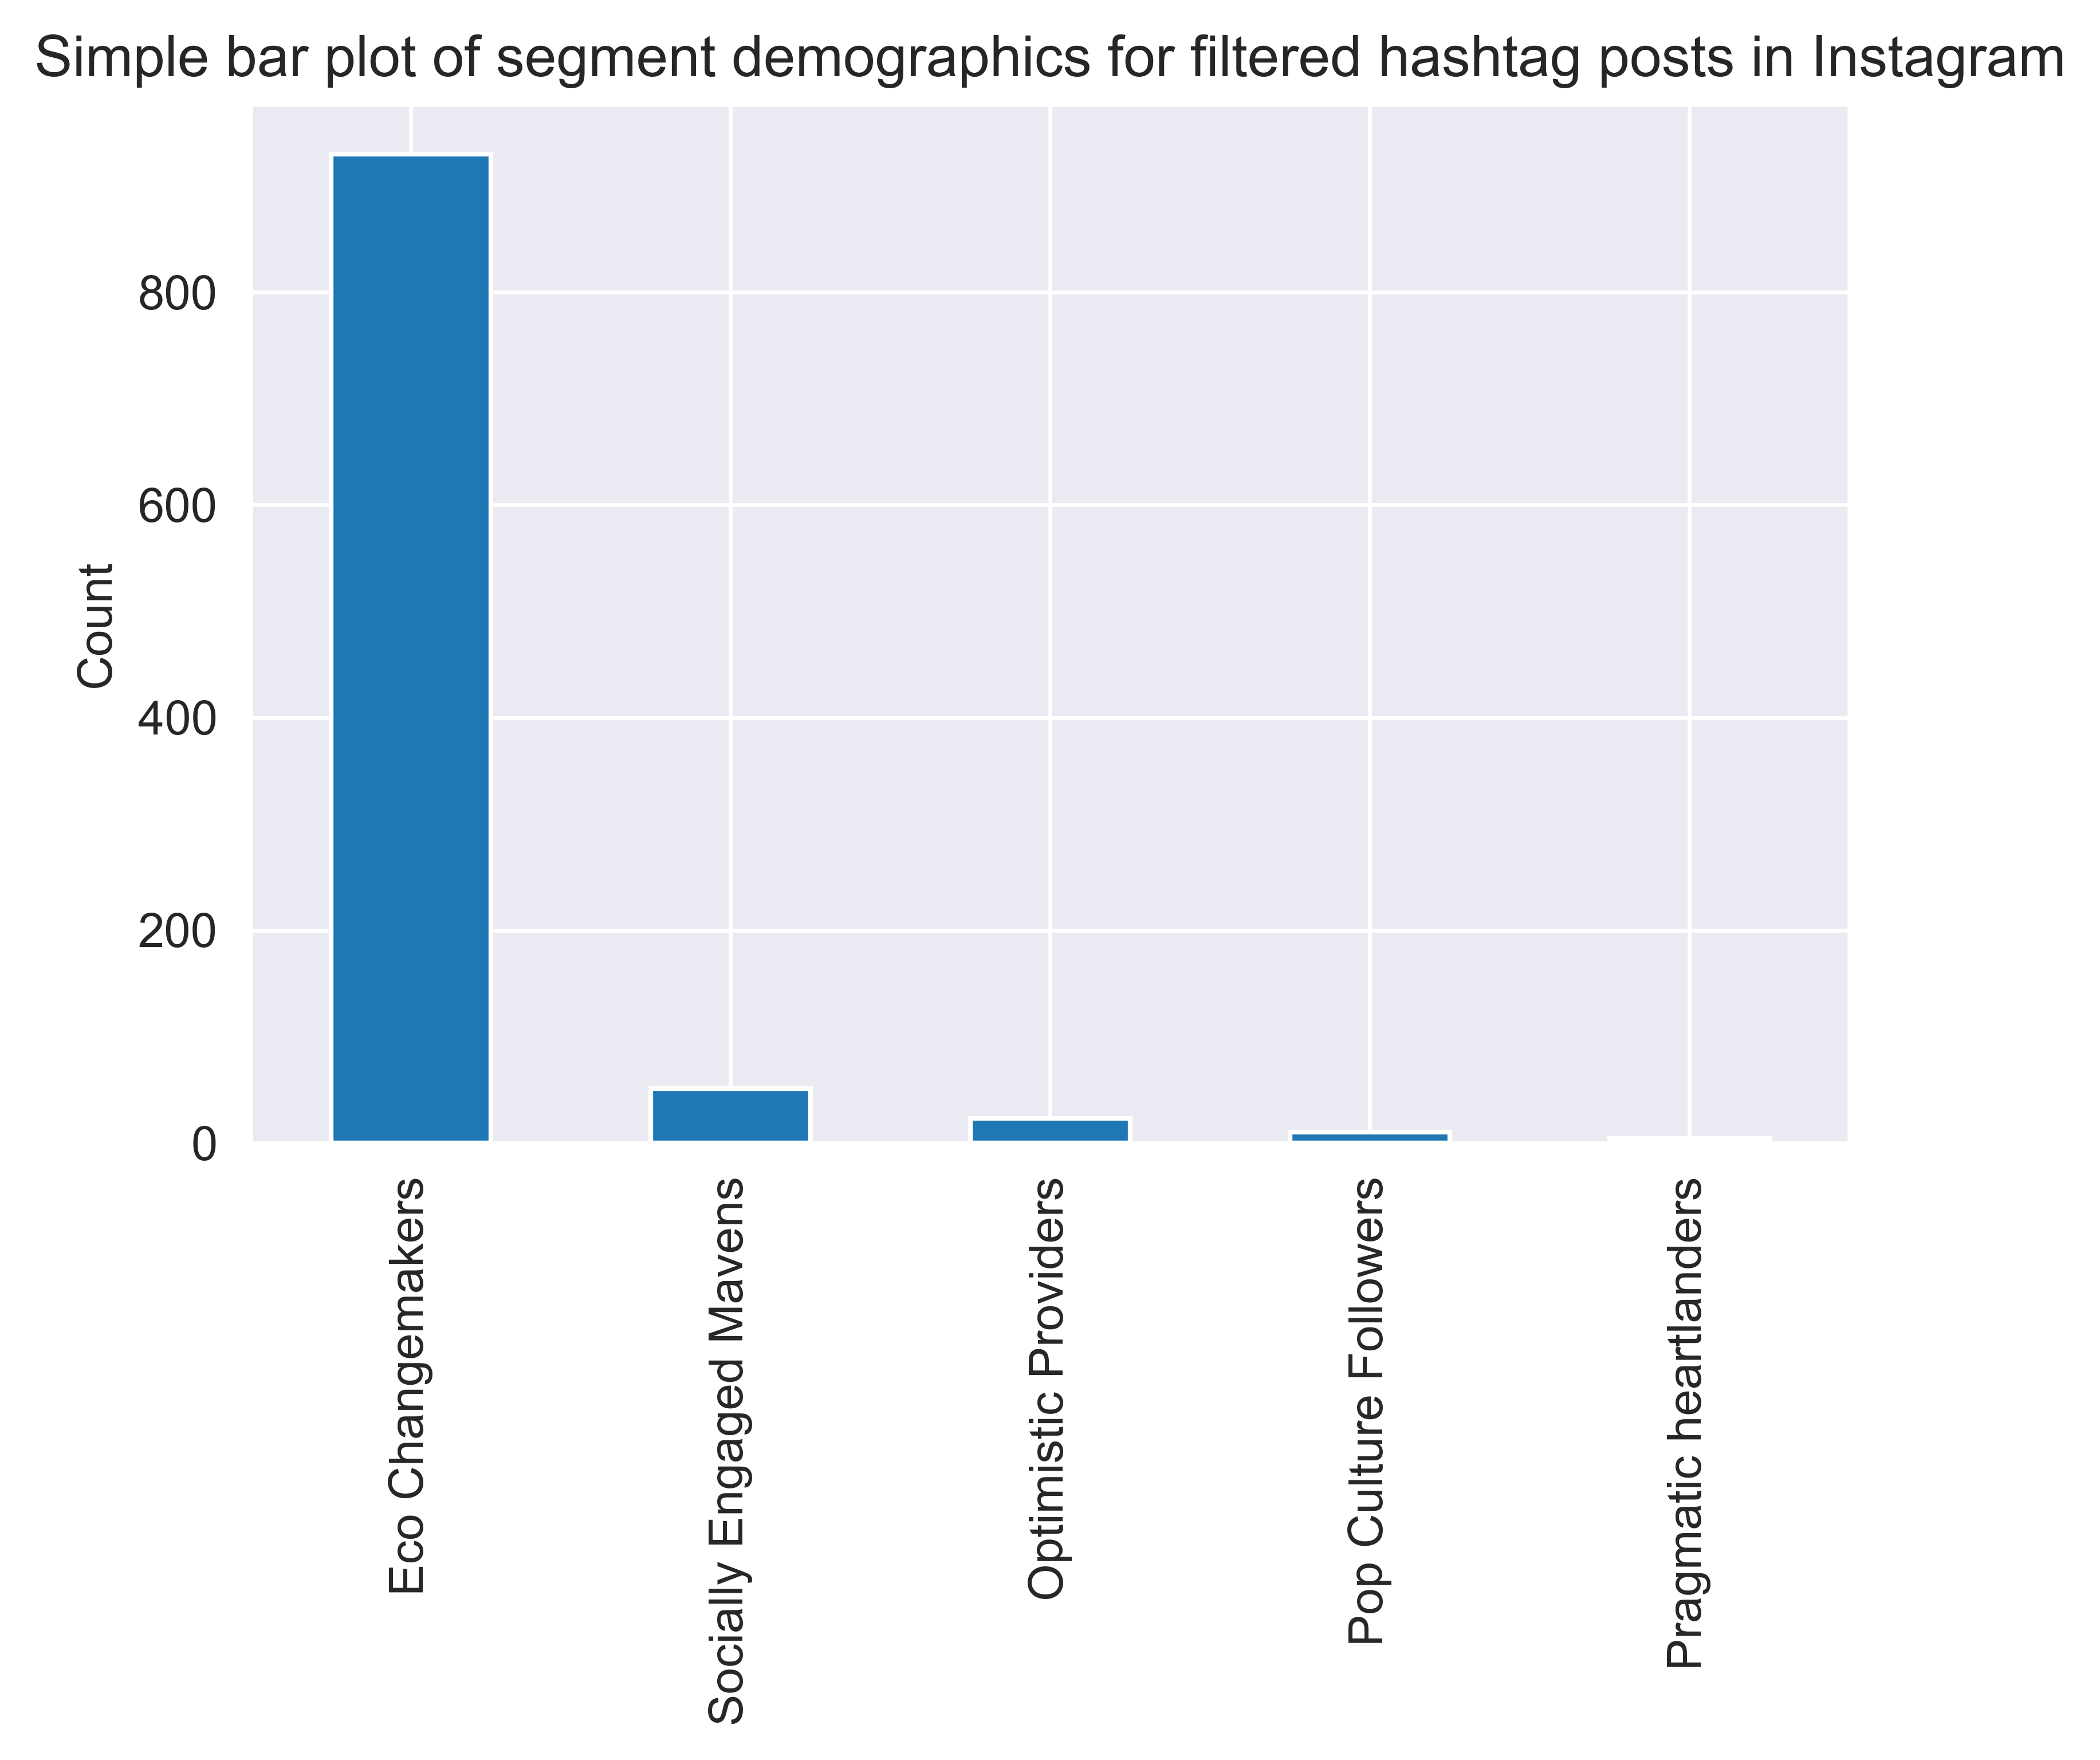

In [175]:
plt.style.library['seaborn-colorblind'] # Care for the color-blind :")
plt.figure(dpi=600)
plt.title("Simple bar plot of segment demographics for filtered hashtag posts in Instagram")
plt.ylabel("Count")

ig[ig.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')] \
    .segment_name.value_counts().plot.bar()

In [178]:
ig[ig.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_caption.to_csv("hashtagfiltercontentig.csv")

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/2950375225.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ig[ig.post_hashtags.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')].post_caption.to_csv("hashtagfiltercontentig.csv")


In [184]:
ig_w2v = ig.copy()

In [186]:
ig_w2v = ig_w2v[ig_w2v.post_caption.notnull()]
# ig_w2v = ig_w2v[ig_w2v.post_caption.str.contains('^.*((f|F)ood.*((w|W)ast|(s|S)urplus|.*)|(e|E)at|(I|i)ngredient).*$')]
ig_w2v = ig_w2v[ig_w2v.post_caption.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')]

/var/folders/x1/zp6kq1kj15v_md17wpr_q_n40000gn/T/ipykernel_26760/2670907610.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ig_w2v = ig_w2v[ig_w2v.post_caption.str.contains('^.*(f|F)ood.*((w|W)ast|(s|S)urplus).*$')]


In [187]:
ig_w2v.post_caption = ig_w2v.post_caption.str.lower()
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_html_tags_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_url_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_mentions_hashtags)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_accented_chars_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_punctuation_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_irr_char_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_extra_whitespaces_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(word_tokenize)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_english_stopwords_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(norm_lemm_v_a_func)
ig_w2v.post_caption = ig_w2v.post_caption.apply(remove_single_char_func)

In [189]:
text_corpus = ig_w2v.post_caption.str.cat(sep=" ")
most_common_word_func(text_corpus)

Word  Frequency
6       food        205
12     waste        169
37    reduce         52
10      make         40
188  compost         33
14       get         31
102  plastic         29
28        go         28
272     need         28
57      good         28
265      use         26
135     help         26
133       us         26
88      time         24
122  produce         24
5       take         23
376      eco         22
24      know         20
66       try         19
18      like         19
260      one         18
167     zero         18
247    start         17
181     also         17
134    today         17

In [191]:
all_data = label_sentences(ig_w2v.post_caption, 'Train')

In [192]:
model_dbow = doc2vec.Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, 
                     min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 169/169 [00:00<00:00, 1521110.25it/s]


In [193]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), 
                     total_examples=len(all_data), 
                     epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 169/169 [00:00<00:00, 3192961.15it/s]


/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_datasci/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


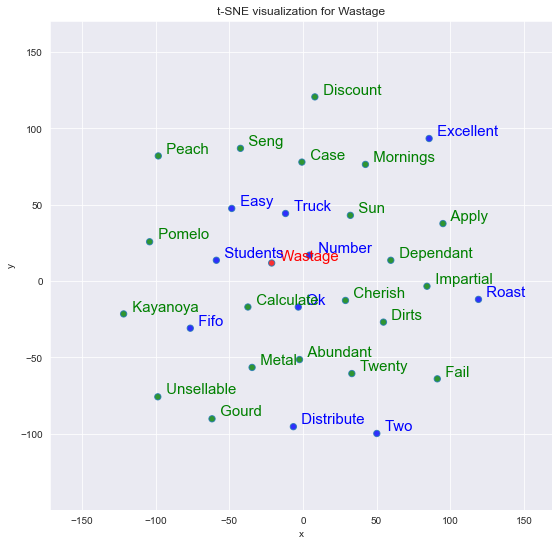

In [195]:
tsnescatterplot(model_dbow, 'wastage',[t[0] for t in model_dbow.wv.most_similar(positive=['wastage'], topn=30)][10:])